# **Rajwinder Singh Assignment New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [4]:
# Import the libraries you will be using for analysis


In [2]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.2.3
pandas version: 2.2.3
matplotlib version: 3.10.1
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [3]:
# Try loading one file

Rajdf01 = pd.read_parquet('2023-1.parquet')
Rajdf01.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

##### How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

19 columns
3066765 rows


To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'
#sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

#sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

In [16]:
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'
#sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself
#sampledraj = pd.concat([sampledraj, sample]) # adding data for this hour to the DF

NameError: name 'hour_data' is not defined

In [5]:
sampled_data.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-10 00:44:09   2023-01-10 00:51:23              1.0   
1         1  2023-01-15 00:32:10   2023-01-15 00:42:27              1.0   
2         1  2023-01-29 00:29:35   2023-01-29 00:42:50              2.0   
3         2  2023-01-14 00:14:30   2023-01-14 00:27:04              1.0   
4         2  2023-01-03 00:55:05   2023-01-03 01:03:28              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.97         1.0                  N           142           164   
1           1.50         1.0                  N           113            79   
2           2.60         1.0                  N           263           143   
3           1.79         1.0                  N            79           158   
4           3.34         1.0                  N           132           132   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         10.7    1.0      0.5        3.14           0.0   
1             1         10.0    3.5      0.5        2.00           0.0   
2             1         15.6    3.5      0.5        4.10           0.0   
3             1         13.5    1.0      0.5        1.48           0.0   
4             2         15.6    1.0      0.5        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         18.84                   2.5         0.00   
1                    1.0         17.00                   2.5         0.00   
2                    1.0         24.70                   2.5         0.00   
3                    1.0         19.98                   2.5         0.00   
4                    1.0         19.35                   0.0         1.25   

   pickup_hour  
0            0  
1            0  
2            0  
3            0  
4            0

In [59]:
sampled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152083 entries, 0 to 152082
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               152083 non-null  int64         
 1   tpep_pickup_datetime   152083 non-null  datetime64[us]
 2   tpep_dropoff_datetime  152083 non-null  datetime64[us]
 3   passenger_count        148555 non-null  float64       
 4   trip_distance          152083 non-null  float64       
 5   RatecodeID             148555 non-null  float64       
 6   store_and_fwd_flag     148555 non-null  object        
 7   PULocationID           152083 non-null  int64         
 8   DOLocationID           152083 non-null  int64         
 9   payment_type           152083 non-null  int64         
 10  fare_amount            152083 non-null  float64       
 11  extra                  152083 non-null  float64       
 12  mta_tax                152083 non-null  floa

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [60]:
Rajdf01['pickup_hour'] = Rajdf01['tpep_pickup_datetime'].dt.hour
rajtaxi = pd.DataFrame()
for hour in Rajdf01['pickup_hour'].unique():
        hour_data = Rajdf01[Rajdf01['pickup_hour'] == hour]
        sample = hour_data.sample(frac=0.05, random_state=42)
        rajtaxi = pd.concat([sampled_data, sample])
rajtaxi = sampled_data.reset_index(drop=True)


In [61]:
rajtaxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152083 entries, 0 to 152082
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               152083 non-null  int64         
 1   tpep_pickup_datetime   152083 non-null  datetime64[us]
 2   tpep_dropoff_datetime  152083 non-null  datetime64[us]
 3   passenger_count        148555 non-null  float64       
 4   trip_distance          152083 non-null  float64       
 5   RatecodeID             148555 non-null  float64       
 6   store_and_fwd_flag     148555 non-null  object        
 7   PULocationID           152083 non-null  int64         
 8   DOLocationID           152083 non-null  int64         
 9   payment_type           152083 non-null  int64         
 10  fare_amount            152083 non-null  float64       
 11  extra                  152083 non-null  float64       
 12  mta_tax                152083 non-null  floa

In [62]:
rajtaxi.shape

(152083, 20)

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [11]:
# Store the df in csv/parquet
rajtaxi.to_parquet('rajtaxi.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [63]:
# Load the new data file

rajtaxi1=pd.read_parquet('rajtaxi.parquet')
rajtaxi1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152083 entries, 0 to 152082
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               152083 non-null  int64         
 1   tpep_pickup_datetime   152083 non-null  datetime64[us]
 2   tpep_dropoff_datetime  152083 non-null  datetime64[us]
 3   passenger_count        148555 non-null  float64       
 4   trip_distance          152083 non-null  float64       
 5   RatecodeID             148555 non-null  float64       
 6   store_and_fwd_flag     148555 non-null  object        
 7   PULocationID           152083 non-null  int64         
 8   DOLocationID           152083 non-null  int64         
 9   payment_type           152083 non-null  int64         
 10  fare_amount            152083 non-null  float64       
 11  extra                  152083 non-null  float64       
 12  mta_tax                152083 non-null  floa

In [66]:
rajtaxi1.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-10 00:44:09   2023-01-10 00:51:23              1.0   
1         1  2023-01-15 00:32:10   2023-01-15 00:42:27              1.0   
2         1  2023-01-29 00:29:35   2023-01-29 00:42:50              2.0   
3         2  2023-01-14 00:14:30   2023-01-14 00:27:04              1.0   
4         2  2023-01-03 00:55:05   2023-01-03 01:03:28              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.97         1.0                  N           142           164   
1           1.50         1.0                  N           113            79   
2           2.60         1.0                  N           263           143   
3           1.79         1.0                  N            79           158   
4           3.34         1.0                  N           132           132   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         10.7    1.0      0.5        3.14           0.0   
1             1         10.0    3.5      0.5        2.00           0.0   
2             1         15.6    3.5      0.5        4.10           0.0   
3             1         13.5    1.0      0.5        1.48           0.0   
4             2         15.6    1.0      0.5        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         18.84                   2.5         0.00   
1                    1.0         17.00                   2.5         0.00   
2                    1.0         24.70                   2.5         0.00   
3                    1.0         19.98                   2.5         0.00   
4                    1.0         19.35                   0.0         1.25   

   pickup_hour  
0            0  
1            0  
2            0  
3            0  
4            0

In [65]:
rajtaxi1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152083 entries, 0 to 152082
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               152083 non-null  int64         
 1   tpep_pickup_datetime   152083 non-null  datetime64[us]
 2   tpep_dropoff_datetime  152083 non-null  datetime64[us]
 3   passenger_count        148555 non-null  float64       
 4   trip_distance          152083 non-null  float64       
 5   RatecodeID             148555 non-null  float64       
 6   store_and_fwd_flag     148555 non-null  object        
 7   PULocationID           152083 non-null  int64         
 8   DOLocationID           152083 non-null  int64         
 9   payment_type           152083 non-null  int64         
 10  fare_amount            152083 non-null  float64       
 11  extra                  152083 non-null  float64       
 12  mta_tax                152083 non-null  floa

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [203]:
#fix the index
rajtaxi1 = rajtaxi1.reset_index(drop=True)

In [67]:
rajtaxi1.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-10 00:44:09   2023-01-10 00:51:23              1.0   
1         1  2023-01-15 00:32:10   2023-01-15 00:42:27              1.0   
2         1  2023-01-29 00:29:35   2023-01-29 00:42:50              2.0   
3         2  2023-01-14 00:14:30   2023-01-14 00:27:04              1.0   
4         2  2023-01-03 00:55:05   2023-01-03 01:03:28              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.97         1.0                  N           142           164   
1           1.50         1.0                  N           113            79   
2           2.60         1.0                  N           263           143   
3           1.79         1.0                  N            79           158   
4           3.34         1.0                  N           132           132   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         10.7    1.0      0.5        3.14           0.0   
1             1         10.0    3.5      0.5        2.00           0.0   
2             1         15.6    3.5      0.5        4.10           0.0   
3             1         13.5    1.0      0.5        1.48           0.0   
4             2         15.6    1.0      0.5        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         18.84                   2.5         0.00   
1                    1.0         17.00                   2.5         0.00   
2                    1.0         24.70                   2.5         0.00   
3                    1.0         19.98                   2.5         0.00   
4                    1.0         19.35                   0.0         1.25   

   pickup_hour  
0            0  
1            0  
2            0  
3            0  
4            0

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [27]:
# Combine the two airport fee columns
#Airportfees=rajtaxi1['airport_fee']
#print(Airportfees.head())


0    0.00
1    0.00
2    0.00
3    0.00
4    1.25
Name: airport_fee, dtype: float64


In [68]:
unique_valuesAPF = rajtaxi1['airport_fee'].unique()
print(unique_valuesAPF)

[ 0.    1.25   nan -1.25]


In [69]:
value_counts = rajtaxi1['airport_fee'].value_counts()
print(value_counts)

airport_fee
 0.00    135517
 1.25     13033
-1.25         5
Name: count, dtype: int64


In [30]:
#value_counts123 = rajtaxi1['Airport_fee'].value_counts()
#print(value_counts123)

KeyError: 'Airport_fee'

In [31]:
remove extra airport fees COL as the value of 1.25 is just 12,000 which is very less
rajtaxi1 = rajtaxi1.drop('airport_fee', axis=1)

In [70]:
rajtaxi1.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-10 00:44:09   2023-01-10 00:51:23              1.0   
1         1  2023-01-15 00:32:10   2023-01-15 00:42:27              1.0   
2         1  2023-01-29 00:29:35   2023-01-29 00:42:50              2.0   
3         2  2023-01-14 00:14:30   2023-01-14 00:27:04              1.0   
4         2  2023-01-03 00:55:05   2023-01-03 01:03:28              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.97         1.0                  N           142           164   
1           1.50         1.0                  N           113            79   
2           2.60         1.0                  N           263           143   
3           1.79         1.0                  N            79           158   
4           3.34         1.0                  N           132           132   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         10.7    1.0      0.5        3.14           0.0   
1             1         10.0    3.5      0.5        2.00           0.0   
2             1         15.6    3.5      0.5        4.10           0.0   
3             1         13.5    1.0      0.5        1.48           0.0   
4             2         15.6    1.0      0.5        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         18.84                   2.5         0.00   
1                    1.0         17.00                   2.5         0.00   
2                    1.0         24.70                   2.5         0.00   
3                    1.0         19.98                   2.5         0.00   
4                    1.0         19.35                   0.0         1.25   

   pickup_hour  
0            0  
1            0  
2            0  
3            0  
4            0

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [71]:
# check where values of fare amount are negative
value_counts_fare = rajtaxi1['fare_amount'].value_counts()
print(value_counts_fare)


fare_amount
8.60     7711
9.30     7301
10.00    7166
7.20     7122
7.90     7105
         ... 
16.31       1
37.98       1
15.53       1
24.11       1
36.20       1
Name: count, Length: 2104, dtype: int64


In [72]:
unique_values_fare = rajtaxi1['fare_amount'].unique()
print(unique_values_fare)

[10.7  10.   15.6  ... 19.58 13.3  53.  ]


In [73]:
negative_values = rajtaxi1[rajtaxi1['fare_amount'] < 0]['fare_amount']
print(negative_values)


Series([], Name: fare_amount, dtype: float64)


In [74]:
negative_values2 = rajtaxi1[rajtaxi1['extra'] < 0]['extra']
print(negative_values2)

Series([], Name: extra, dtype: float64)


In [75]:
rajtaxi1.loc[rajtaxi1['mta_tax'] < 0, 'mta_tax'] = 0

In [76]:
rajtaxi1.loc[rajtaxi1['improvement_surcharge'] < 0, 'improvement_surcharge'] = 0

In [77]:
rajtaxi1.loc[rajtaxi1['tip_amount'] < 0, 'tip_amount'] = 0

In [78]:
rajtaxi1.loc[rajtaxi1['total_amount'] < 0, 'total_amount'] = 0

In [79]:
rajtaxi1.loc[rajtaxi1['congestion_surcharge'] < 0, 'congestion_surcharge'] = 0

In [80]:
rajtaxi1.loc[rajtaxi1['airport_fee'] < 0, 'airport_fee'] = 0

Did you notice something different in the `RatecodeID` column for above records?

In [81]:
# Analyse RatecodeID for the negative fare amounts

negative_values_ratecodeid = rajtaxi1[rajtaxi1['RatecodeID'] < 0]['RatecodeID']
print(negative_values_ratecodeid)

Series([], Name: RatecodeID, dtype: float64)


In [ ]:
# Find which columns have negative values



In [ ]:
# fix these negative values



### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [82]:
# Find the proportion of missing values in each column
# Find the number of missing values in each column
missing_values = rajtaxi1.isnull().sum()

# Display the result
print(missing_values)


VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          3528
trip_distance               0
RatecodeID               3528
store_and_fwd_flag       3528
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     3528
airport_fee              3528
pickup_hour                 0
dtype: int64


In [83]:
# Calculate the percentage of missing values in each column
missing_percentage = (rajtaxi1.isnull().sum() / len(rajtaxi1)) * 100

# Display the result
print(missing_percentage)

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          2.319786
trip_distance            0.000000
RatecodeID               2.319786
store_and_fwd_flag       2.319786
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     2.319786
airport_fee              2.319786
pickup_hour              0.000000
dtype: float64


In [84]:
rajtaxi1.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-10 00:44:09   2023-01-10 00:51:23              1.0   
1         1  2023-01-15 00:32:10   2023-01-15 00:42:27              1.0   
2         1  2023-01-29 00:29:35   2023-01-29 00:42:50              2.0   
3         2  2023-01-14 00:14:30   2023-01-14 00:27:04              1.0   
4         2  2023-01-03 00:55:05   2023-01-03 01:03:28              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.97         1.0                  N           142           164   
1           1.50         1.0                  N           113            79   
2           2.60         1.0                  N           263           143   
3           1.79         1.0                  N            79           158   
4           3.34         1.0                  N           132           132   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         10.7    1.0      0.5        3.14           0.0   
1             1         10.0    3.5      0.5        2.00           0.0   
2             1         15.6    3.5      0.5        4.10           0.0   
3             1         13.5    1.0      0.5        1.48           0.0   
4             2         15.6    1.0      0.5        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         18.84                   2.5         0.00   
1                    1.0         17.00                   2.5         0.00   
2                    1.0         24.70                   2.5         0.00   
3                    1.0         19.98                   2.5         0.00   
4                    1.0         19.35                   0.0         1.25   

   pickup_hour  
0            0  
1            0  
2            0  
3            0  
4            0

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [85]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
rajtaxi1['passenger_count'].fillna(0)


0         1.0
1         1.0
2         2.0
3         1.0
4         1.0
         ... 
152078    2.0
152079    1.0
152080    2.0
152081    1.0
152082    1.0
Name: passenger_count, Length: 152083, dtype: float64

In [86]:
missing_values123 = rajtaxi1.isnull().sum()
print(missing_values123)

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          3528
trip_distance               0
RatecodeID               3528
store_and_fwd_flag       3528
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     3528
airport_fee              3528
pickup_hour                 0
dtype: int64


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [87]:
# Fix missing values in 'RatecodeID'
rajtaxi1['RatecodeID'] = rajtaxi1['RatecodeID'].fillna(rajtaxi1['RatecodeID'].mean())

In [88]:
missing_values456 = rajtaxi1.isnull().sum()
print(missing_values456)

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          3528
trip_distance               0
RatecodeID                  0
store_and_fwd_flag       3528
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     3528
airport_fee              3528
pickup_hour                 0
dtype: int64


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [89]:
# handle null values in congestion_surcharge

# Replace NaN with 0
rajtaxi1['congestion_surcharge'] = rajtaxi1['congestion_surcharge'].fillna(0)


In [90]:
missing_values789 = rajtaxi1.isnull().sum()
print(missing_values789)

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          3528
trip_distance               0
RatecodeID                  0
store_and_fwd_flag       3528
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge        0
airport_fee              3528
pickup_hour                 0
dtype: int64


In [112]:
# Print the first 5 rows of the entire DataFrame
print(rajtaxi1.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-10 00:44:09   2023-01-10 00:51:23              1.0   
1         1  2023-01-15 00:32:10   2023-01-15 00:42:27              1.0   
2         1  2023-01-29 00:29:35   2023-01-29 00:42:50              2.0   
3         2  2023-01-14 00:14:30   2023-01-14 00:27:04              1.0   
4         2  2023-01-03 00:55:05   2023-01-03 01:03:28              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.97         1.0                  N           142           164   
1           1.50         1.0                  N           113            79   
2           2.60         1.0                  N           263           143   
3           1.79         1.0                  N            79           158   
4           3.34         1.0                  N           132           132   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


In [113]:
print(rajtaxi1.shape)

(152083, 20)


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [93]:
# Handle any remaining missing values

rajtaxi1['passenger_count'] = rajtaxi1['passenger_count'].fillna(rajtaxi1['passenger_count'].mean())
rajtaxi1['store_and_fwd_flag'] = rajtaxi1['store_and_fwd_flag'].fillna('N')


In [94]:
missing_values789 = rajtaxi1.isnull().sum()
print(missing_values789)

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count             0
trip_distance               0
RatecodeID                  0
store_and_fwd_flag          0
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge        0
airport_fee              3528
pickup_hour                 0
dtype: int64


In [96]:
print(rajtaxi1['airport_fee'].mean())

0.10966477062367473


In [107]:
print(rajtaxi1['airport_fee'].median())

0.0


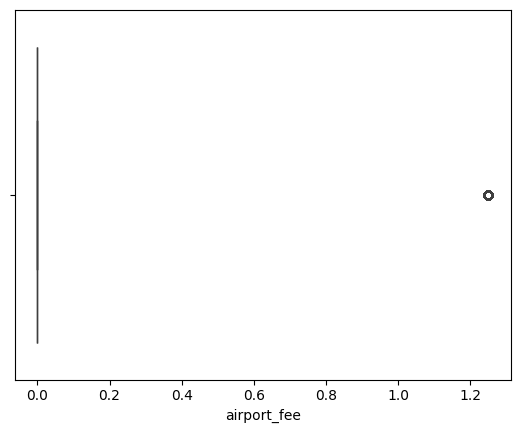

In [108]:
sns.boxplot(x=rajtaxi1['airport_fee'])
plt.show()

In [109]:
quartiles = rajtaxi1['airport_fee'].dropna().quantile([0.25, 0.5, 0.75])
print (quartiles)

0.25    0.0
0.50    0.0
0.75    0.0
Name: airport_fee, dtype: float64


In [110]:
rajtaxi['airport_fee'] = rajtaxi1['airport_fee'].fillna(0)



In [111]:
missing_values1011 = rajtaxi1.isnull().sum()
print(missing_values1011)

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count             0
trip_distance               0
RatecodeID                  0
store_and_fwd_flag          0
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge        0
airport_fee              3528
pickup_hour                 0
dtype: int64


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

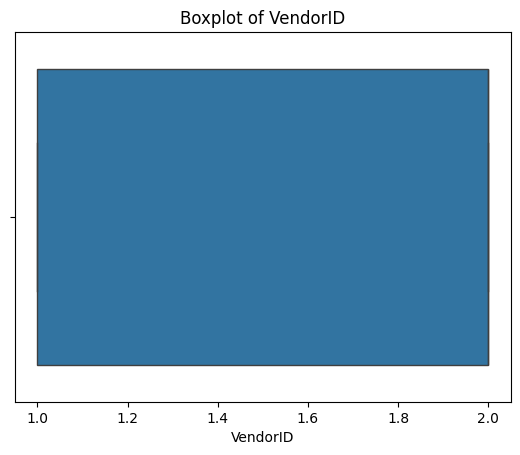

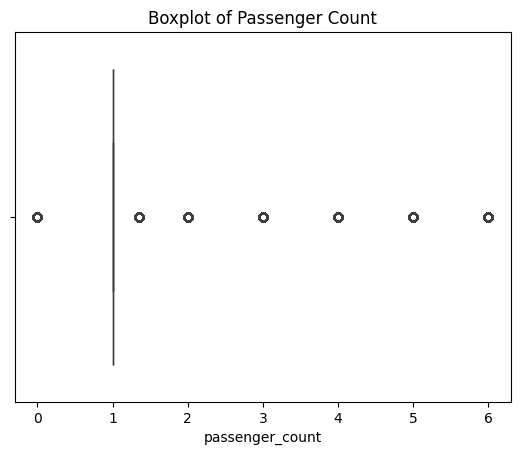

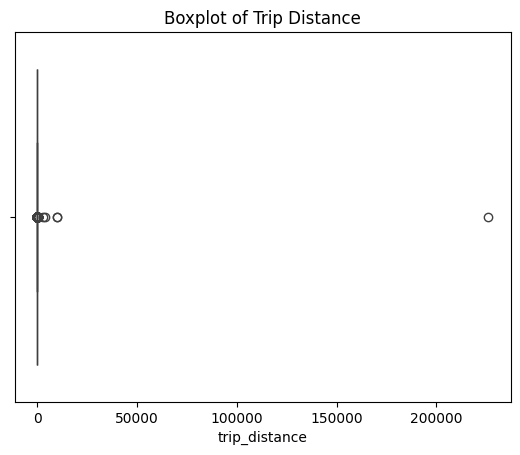

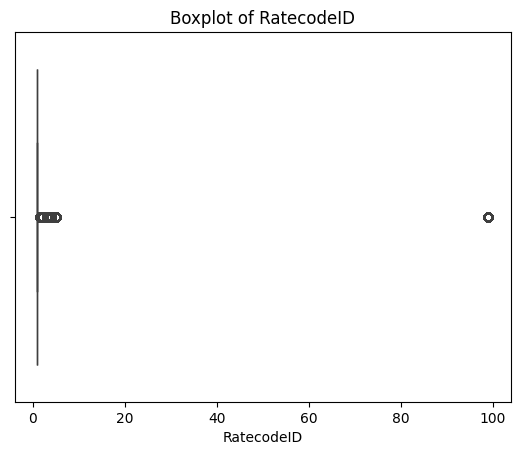

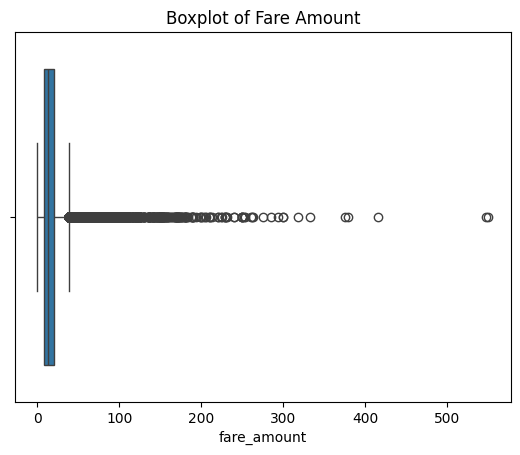

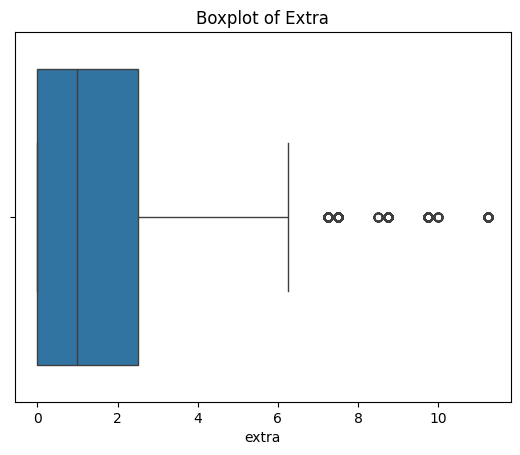

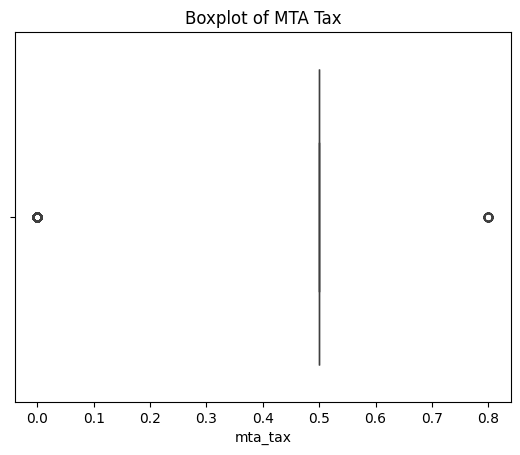

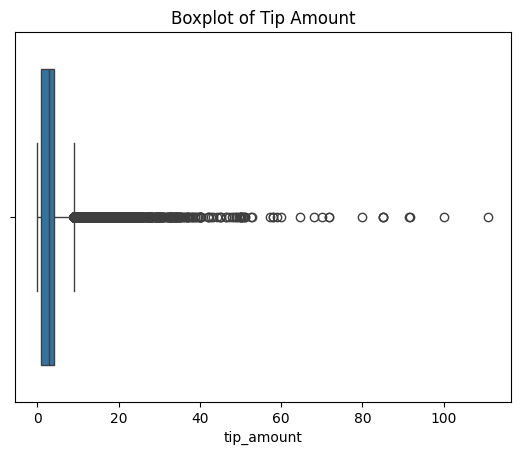

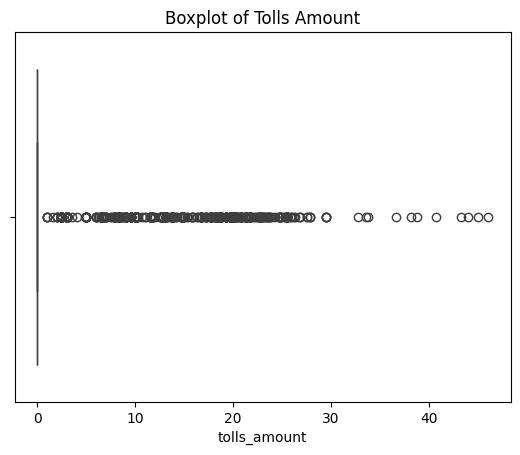

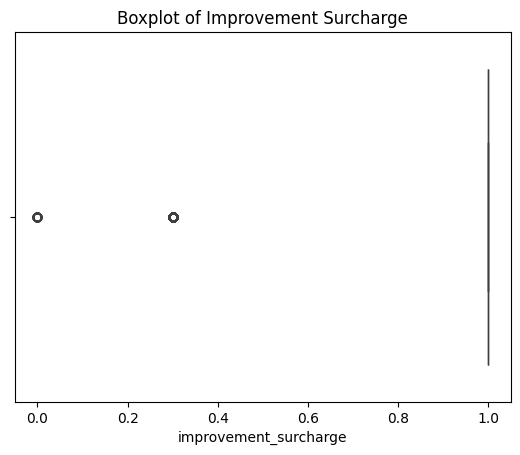

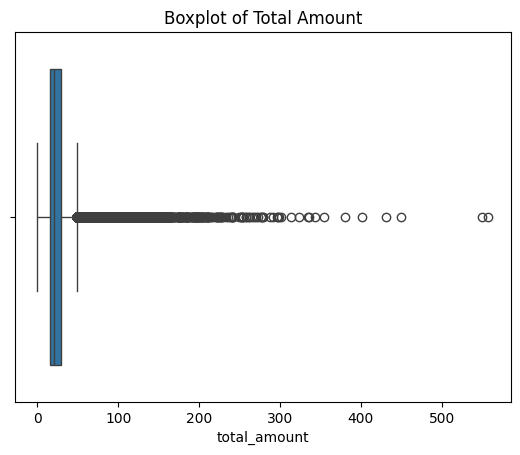

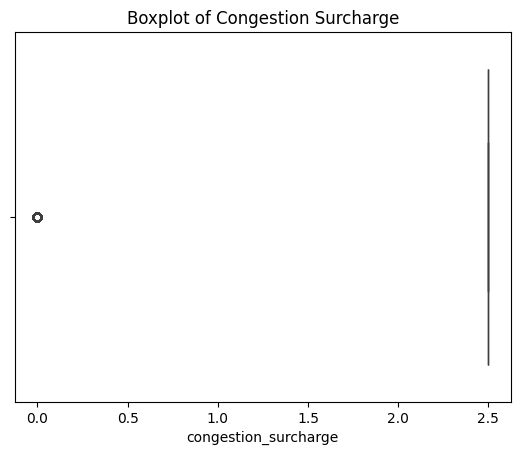

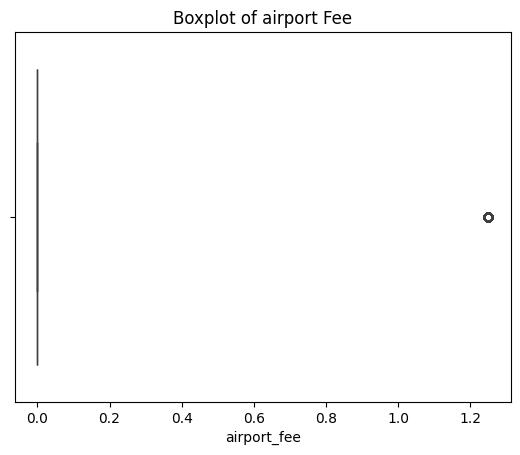

In [114]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for VendorID
sns.boxplot(x=rajtaxi1['VendorID'])
plt.title('Boxplot of VendorID')
plt.show()

# Boxplot for passenger_count
sns.boxplot(x=rajtaxi1['passenger_count'])
plt.title('Boxplot of Passenger Count')
plt.show()

# Boxplot for trip_distance
sns.boxplot(x=rajtaxi1['trip_distance'])
plt.title('Boxplot of Trip Distance')
plt.show()

# Boxplot for RatecodeID
sns.boxplot(x=rajtaxi1['RatecodeID'])
plt.title('Boxplot of RatecodeID')
plt.show()

# Boxplot for fare_amount
sns.boxplot(x=rajtaxi1['fare_amount'])
plt.title('Boxplot of Fare Amount')
plt.show()

# Boxplot for extra
sns.boxplot(x=rajtaxi1['extra'])
plt.title('Boxplot of Extra')
plt.show()

# Boxplot for mta_tax
sns.boxplot(x=rajtaxi1['mta_tax'])
plt.title('Boxplot of MTA Tax')
plt.show()

# Boxplot for tip_amount
sns.boxplot(x=rajtaxi1['tip_amount'])
plt.title('Boxplot of Tip Amount')
plt.show()

# Boxplot for tolls_amount
sns.boxplot(x=rajtaxi1['tolls_amount'])
plt.title('Boxplot of Tolls Amount')
plt.show()

# Boxplot for improvement_surcharge
sns.boxplot(x=rajtaxi1['improvement_surcharge'])
plt.title('Boxplot of Improvement Surcharge')
plt.show()

# Boxplot for total_amount
sns.boxplot(x=rajtaxi1['total_amount'])
plt.title('Boxplot of Total Amount')
plt.show()

# Boxplot for congestion_surcharge
sns.boxplot(x=rajtaxi1['congestion_surcharge'])
plt.title('Boxplot of Congestion Surcharge')
plt.show()

# Boxplot for Airport_fee
sns.boxplot(x=rajtaxi1['airport_fee'])
plt.title('Boxplot of airport Fee')
plt.show()


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

In [115]:
outliers_1 = rajtaxi1[(rajtaxi1['trip_distance'] < 0.1) & (rajtaxi1['fare_amount'] > 300)]
print(outliers_1)

        VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
30638          2  2023-01-24 02:08:50   2023-01-24 02:09:04              2.0   
145872         1  2023-01-11 18:09:25   2023-01-11 18:11:22              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
30638             0.0         5.0                  N           265   
145872            0.0         5.0                  N           265   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
30638            265             2        550.0    0.0      0.0         0.0   
145872           265             1        379.0    0.0      0.0         0.0   

        tolls_amount  improvement_surcharge  total_amount  \
30638           6.55                    1.0        557.55   
145872          0.00                    1.0        380.00   

        congestion_surcharge  airport_fee  pickup_hour  
30638                    0.0          0.0            2  
145872      

In [117]:
rajtaxi1 = rajtaxi1[~((rajtaxi1['trip_distance'] < 0.1) & (rajtaxi1['fare_amount'] > 300))]

In [118]:
rajtaxi1.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-10 00:44:09   2023-01-10 00:51:23              1.0   
1         1  2023-01-15 00:32:10   2023-01-15 00:42:27              1.0   
2         1  2023-01-29 00:29:35   2023-01-29 00:42:50              2.0   
3         2  2023-01-14 00:14:30   2023-01-14 00:27:04              1.0   
4         2  2023-01-03 00:55:05   2023-01-03 01:03:28              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.97         1.0                  N           142           164   
1           1.50         1.0                  N           113            79   
2           2.60         1.0                  N           263           143   
3           1.79         1.0                  N            79           158   
4           3.34         1.0                  N           132           132   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         10.7    1.0      0.5        3.14           0.0   
1             1         10.0    3.5      0.5        2.00           0.0   
2             1         15.6    3.5      0.5        4.10           0.0   
3             1         13.5    1.0      0.5        1.48           0.0   
4             2         15.6    1.0      0.5        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         18.84                   2.5         0.00   
1                    1.0         17.00                   2.5         0.00   
2                    1.0         24.70                   2.5         0.00   
3                    1.0         19.98                   2.5         0.00   
4                    1.0         19.35                   0.0         1.25   

   pickup_hour  
0            0  
1            0  
2            0  
3            0  
4            0

In [119]:
# Analyze
outliers_2 = rajtaxi1[(rajtaxi1['trip_distance'] == 0) & (rajtaxi1['fare_amount'] == 0) & (rajtaxi1['pickup_zone'] != rajtaxi1['dropoff_zone'])]
print(outliers_2)

# Remove
#df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['pickup_zone'] != df['dropoff_zone']))]

KeyError: 'pickup_zone'

First, let us remove 7+ passenger counts as there are very less instances.

In [120]:
# remove passenger_count > 6
rajtaxi1 = rajtaxi1[rajtaxi1['passenger_count'] <= 6]



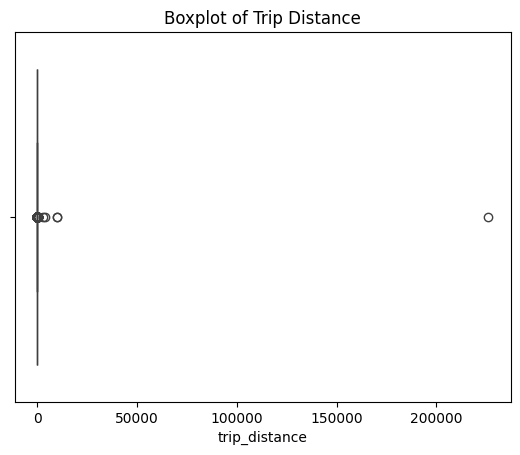

In [122]:
# Boxplot for trip_distance
sns.boxplot(x=rajtaxi1['trip_distance'])
plt.title('Boxplot of Trip Distance')
plt.show()

In [123]:
count = (rajtaxi1['trip_distance'] > 60000).sum()
print(count)

1


In [124]:
count = (rajtaxi1['trip_distance'] > 10000).sum()
print(count)

1


In [125]:
# Continue with outlier handling
rajtaxi1 = rajtaxi1[rajtaxi1['trip_distance'] <= 10000]


In [126]:
#Entries where trip_distance is more than 250 miles.
count_outliers = len(rajtaxi1[rajtaxi1['trip_distance'] > 250])
count_outliers


4

In [127]:
# Delete rows where trip_distance > 250 miles
rajtaxi1 = rajtaxi1[rajtaxi1['trip_distance'] <= 250]

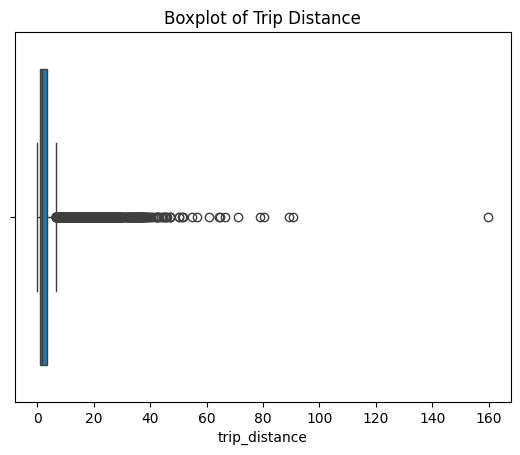

In [128]:
sns.boxplot(x=rajtaxi1['trip_distance'])
plt.title('Boxplot of Trip Distance')
plt.show()

In [129]:
#Entries where payment_type is 0 (there is no payment_type 0 defined in the data dictionary)
# Check entries where payment_type is 0
entries_with_payment_type_0 = rajtaxi1[rajtaxi1['payment_type'] == 0]
print(entries_with_payment_type_0)


        VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
82             2  2023-01-22 00:14:14   2023-01-22 00:37:33         1.358359   
92             2  2023-01-01 00:32:00   2023-01-01 01:07:00         1.358359   
94             1  2023-01-15 00:05:36   2023-01-15 00:25:48         1.358359   
109            2  2023-01-28 00:21:00   2023-01-28 00:29:00         1.358359   
170            2  2023-01-08 00:36:00   2023-01-08 01:02:00         1.358359   
...          ...                  ...                   ...              ...   
151785         1  2023-01-12 18:32:49   2023-01-12 18:37:10         1.358359   
151826         2  2023-01-25 18:39:12   2023-01-25 18:55:16         1.358359   
151925         1  2023-01-05 18:07:13   2023-01-05 18:13:10         1.358359   
151965         1  2023-01-24 18:18:53   2023-01-24 18:42:12         1.358359   
152058         2  2023-01-03 18:40:35   2023-01-03 18:46:21         1.358359   

        trip_distance  RatecodeID store

In [130]:
# Check entries where payment_type is 0
# Count of entries where payment_type is 0
count_entries = len(rajtaxi1[rajtaxi1['payment_type'] == 0])
print(f"Number of entries where payment_type is 0: {count_entries}")

Number of entries where payment_type is 0: 3525


In [131]:
# Calculate the percentage of entries where payment_type is 0
total_entries = len(rajtaxi1)  # Total number of rows in the DataFrame
count_entries = len(rajtaxi1[rajtaxi1['payment_type'] == 0])  # Count of rows where payment_type is 0

percentage = (count_entries / total_entries) * 100
print (percentage)

2.317919987374734


In [132]:
# Delete rows where payment_type is 0
rajtaxi1 = rajtaxi1[rajtaxi1['payment_type'] != 0]

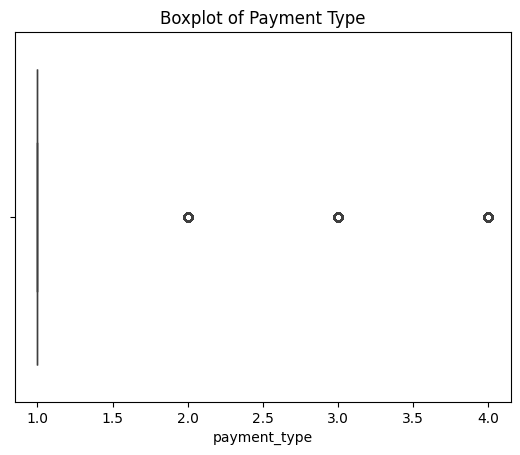

In [133]:
sns.boxplot(x=rajtaxi1['payment_type'])
plt.title('Boxplot of Payment Type')
plt.show()

In [ ]:
# Do any columns need standardising?



## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [134]:
rajtaxi1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148551 entries, 0 to 152082
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               148551 non-null  int64         
 1   tpep_pickup_datetime   148551 non-null  datetime64[us]
 2   tpep_dropoff_datetime  148551 non-null  datetime64[us]
 3   passenger_count        148551 non-null  float64       
 4   trip_distance          148551 non-null  float64       
 5   RatecodeID             148551 non-null  float64       
 6   store_and_fwd_flag     148551 non-null  object        
 7   PULocationID           148551 non-null  int64         
 8   DOLocationID           148551 non-null  int64         
 9   payment_type           148551 non-null  int64         
 10  fare_amount            148551 non-null  float64       
 11  extra                  148551 non-null  float64       
 12  mta_tax                148551 non-null  float64  

In [136]:
rajtaxi1.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'pickup_hour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
VendorID: Numerical
tpep_pickup_datetime: Categorical (Datetime)
tpep_dropoff_datetime: Categorical (Datetime)
passenger_count: Numerical
trip_distance: Numerical
RatecodeID: Categorical
PULocationID: Categorical
DOLocationID: Categorical
payment_type: Categorical
pickup_hour: Numerical
trip_duration: Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`: Numerical
* `extra`: Numerical
* `mta_tax`: Numerical
* `tip_amount`: Numerical
* `tolls_amount`: Numerical
* `improvement_surcharge`: Numerical
* `total_amount`: Numerical
* `congestion_surcharge`: Numerical
* `airport_fee`: Numerical

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [137]:
rajtaxi1.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-10 00:44:09   2023-01-10 00:51:23              1.0   
1         1  2023-01-15 00:32:10   2023-01-15 00:42:27              1.0   
2         1  2023-01-29 00:29:35   2023-01-29 00:42:50              2.0   
3         2  2023-01-14 00:14:30   2023-01-14 00:27:04              1.0   
4         2  2023-01-03 00:55:05   2023-01-03 01:03:28              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.97         1.0                  N           142           164   
1           1.50         1.0                  N           113            79   
2           2.60         1.0                  N           263           143   
3           1.79         1.0                  N            79           158   
4           3.34         1.0                  N           132           132   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         10.7    1.0      0.5        3.14           0.0   
1             1         10.0    3.5      0.5        2.00           0.0   
2             1         15.6    3.5      0.5        4.10           0.0   
3             1         13.5    1.0      0.5        1.48           0.0   
4             2         15.6    1.0      0.5        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         18.84                   2.5         0.00   
1                    1.0         17.00                   2.5         0.00   
2                    1.0         24.70                   2.5         0.00   
3                    1.0         19.98                   2.5         0.00   
4                    1.0         19.35                   0.0         1.25   

   pickup_hour  
0            0  
1            0  
2            0  
3            0  
4            0

In [138]:
rajtaxi1['Pick-up Date'] = pd.to_datetime(rajtaxi1['tpep_pickup_datetime']).dt.date
rajtaxi1['Pick-up Time'] = pd.to_datetime(rajtaxi1['tpep_pickup_datetime']).dt.time
rajtaxi1['Drop-off Date'] = pd.to_datetime(rajtaxi1['tpep_dropoff_datetime']).dt.date
rajtaxi1['Drop-pff Time Time'] = pd.to_datetime(rajtaxi1['tpep_dropoff_datetime']).dt.time

In [139]:
rajtaxi1.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-10 00:44:09   2023-01-10 00:51:23              1.0   
1         1  2023-01-15 00:32:10   2023-01-15 00:42:27              1.0   
2         1  2023-01-29 00:29:35   2023-01-29 00:42:50              2.0   
3         2  2023-01-14 00:14:30   2023-01-14 00:27:04              1.0   
4         2  2023-01-03 00:55:05   2023-01-03 01:03:28              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.97         1.0                  N           142           164   
1           1.50         1.0                  N           113            79   
2           2.60         1.0                  N           263           143   
3           1.79         1.0                  N            79           158   
4           3.34         1.0                  N           132           132   

   payment_type  ...  tolls_amount  improvement_surcharge  total_amount  \
0             1  ...           0.0                    1.0         18.84   
1             1  ...           0.0                    1.0         17.00   
2             1  ...           0.0                    1.0         24.70   
3             1  ...           0.0                    1.0         19.98   
4             2  ...           0.0                    1.0         19.35   

   congestion_surcharge  airport_fee  pickup_hour  Pick-up Date  Pick-up Time  \
0                   2.5         0.00            0    2023-01-10      00:44:09   
1                   2.5         0.00            0    2023-01-15      00:32:10   
2                   2.5         0.00            0    2023-01-29      00:29:35   
3                   2.5         0.00            0    2023-01-14      00:14:30   
4                   0.0         1.25            0    2023-01-03      00:55:05   

   Drop-off Date  Drop-pff Time Time  
0     2023-01-10            00:51:23  
1     2023-01-15            00:42:27  
2     2023-01-29            00:42:50  
3     2023-01-14            00:27:04  
4     2023-01-03            01:03:28  

[5 rows x 24 columns]

In [140]:
rajtaxi1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148551 entries, 0 to 152082
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               148551 non-null  int64         
 1   tpep_pickup_datetime   148551 non-null  datetime64[us]
 2   tpep_dropoff_datetime  148551 non-null  datetime64[us]
 3   passenger_count        148551 non-null  float64       
 4   trip_distance          148551 non-null  float64       
 5   RatecodeID             148551 non-null  float64       
 6   store_and_fwd_flag     148551 non-null  object        
 7   PULocationID           148551 non-null  int64         
 8   DOLocationID           148551 non-null  int64         
 9   payment_type           148551 non-null  int64         
 10  fare_amount            148551 non-null  float64       
 11  extra                  148551 non-null  float64       
 12  mta_tax                148551 non-null  float64  

<Axes: title={'center': 'Hourly Trends in Taxi Pickups'}, xlabel='Hour of the Day', ylabel='Total Passengers'>

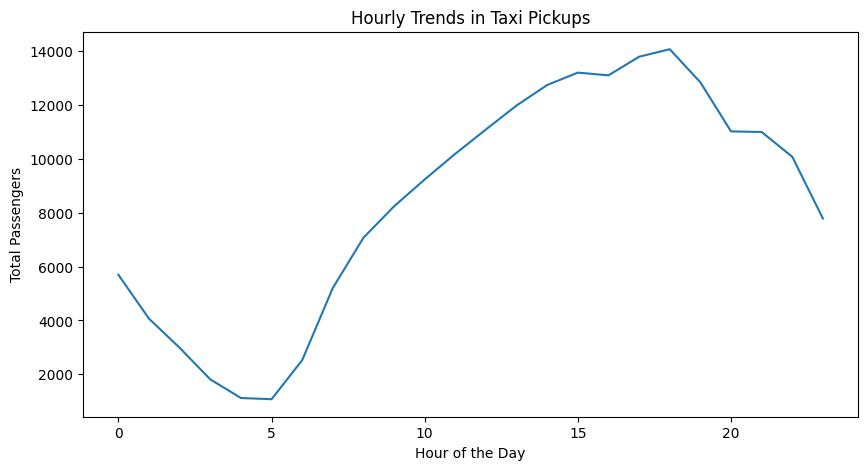

In [141]:
# Find and show the hourly trends in taxi pickups
rajtaxi1['pickup_hour'] = pd.to_datetime(rajtaxi1['tpep_pickup_datetime']).dt.hour
hourly_trends=rajtaxi1.groupby('pickup_hour')['passenger_count'].sum()
hourly_trends.plot(kind='line', figsize=(10, 5), title='Hourly Trends in Taxi Pickups', xlabel='Hour of the Day', ylabel='Total Passengers')


<Axes: title={'center': 'Daily Trends in Taxi Pickups (Days of the Week)'}, xlabel='Day of the Week', ylabel='Total Passengers'>

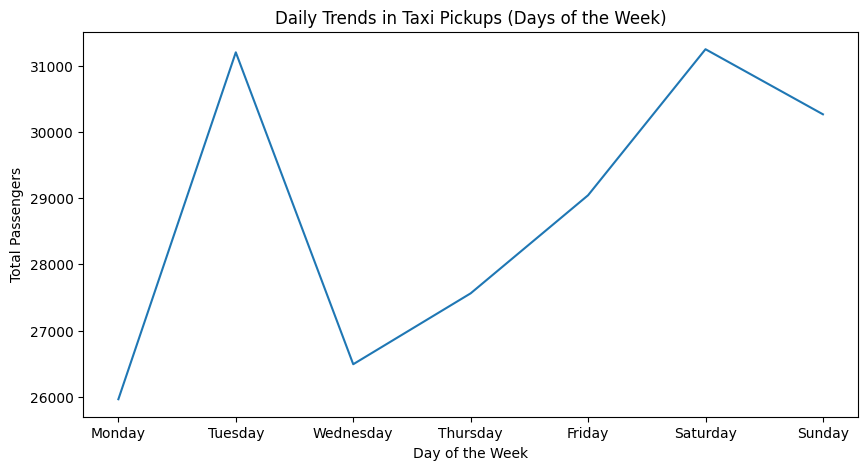

In [142]:
# Find and show the daily trends in taxi pickups (days of the week)
# Extract day of the week from tpep_pickup_datetime
rajtaxi1['pickup_day'] = pd.to_datetime(rajtaxi1['tpep_pickup_datetime']).dt.day_name()

# Group by day of the week and sum passenger_count
daily_trends = rajtaxi1.groupby('pickup_day')['passenger_count'].sum()

# Sort days of the week in correct order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_trends = daily_trends.reindex(day_order)

# Plot the daily trends
daily_trends.plot(kind='line', figsize=(10, 5), title='Daily Trends in Taxi Pickups (Days of the Week)', xlabel='Day of the Week', ylabel='Total Passengers')


<Axes: title={'center': 'Monthly Trends in Taxi Pickups'}, xlabel='Month', ylabel='Total Passengers'>

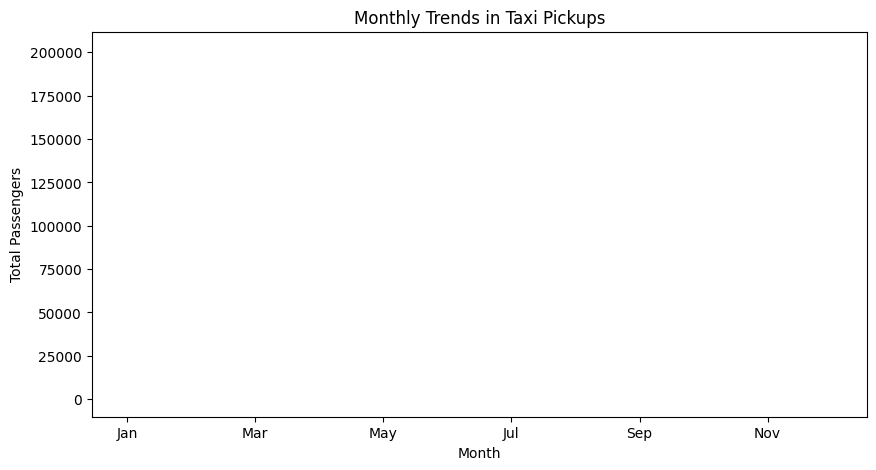

In [143]:
# Show the monthly trends in pickups

# Extract month from tpep_pickup_datetime
rajtaxi1['pickup_month'] = pd.to_datetime(rajtaxi1['tpep_pickup_datetime']).dt.month_name()

# Map full month names to abbreviated forms
month_abbr = {
    'January': 'Jan', 'February': 'Feb', 'March': 'Mar', 'April': 'Apr',
    'May': 'May', 'June': 'Jun', 'July': 'Jul', 'August': 'Aug',
    'September': 'Sep', 'October': 'Oct', 'November': 'Nov', 'December': 'Dec'
}
rajtaxi1['pickup_month'] = rajtaxi1['pickup_month'].map(month_abbr)

# Group by month and sum passenger_count (or count pickups)
monthly_trends = rajtaxi1.groupby('pickup_month')['passenger_count'].sum()

# Sort months in correct order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_trends = monthly_trends.reindex(month_order)

# Plot the monthly trends
monthly_trends.plot(kind='line', figsize=(10, 5), title='Monthly Trends in Taxi Pickups', xlabel='Month', ylabel='Total Passengers')

##### Financial Analysis

In [144]:
rajtaxi1.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-10 00:44:09   2023-01-10 00:51:23              1.0   
1         1  2023-01-15 00:32:10   2023-01-15 00:42:27              1.0   
2         1  2023-01-29 00:29:35   2023-01-29 00:42:50              2.0   
3         2  2023-01-14 00:14:30   2023-01-14 00:27:04              1.0   
4         2  2023-01-03 00:55:05   2023-01-03 01:03:28              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.97         1.0                  N           142           164   
1           1.50         1.0                  N           113            79   
2           2.60         1.0                  N           263           143   
3           1.79         1.0                  N            79           158   
4           3.34         1.0                  N           132           132   

   payment_type  ...  total_amount  congestion_surcharge  airport_fee  \
0             1  ...         18.84                   2.5         0.00   
1             1  ...         17.00                   2.5         0.00   
2             1  ...         24.70                   2.5         0.00   
3             1  ...         19.98                   2.5         0.00   
4             2  ...         19.35                   0.0         1.25   

   pickup_hour  Pick-up Date  Pick-up Time  Drop-off Date  Drop-pff Time Time  \
0            0    2023-01-10      00:44:09     2023-01-10            00:51:23   
1            0    2023-01-15      00:32:10     2023-01-15            00:42:27   
2            0    2023-01-29      00:29:35     2023-01-29            00:42:50   
3            0    2023-01-14      00:14:30     2023-01-14            00:27:04   
4            0    2023-01-03      00:55:05     2023-01-03            01:03:28   

   pickup_day  pickup_month  
0     Tuesday           Jan  
1      Sunday           Jan  
2      Sunday           Jan  
3    Saturday           Jan  
4     Tuesday           Jan  

[5 rows x 26 columns]

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [145]:
# Analyse the above parameters
# Check for zero or negative values in each column
zero_or_negative_fare = rajtaxi1[rajtaxi1['fare_amount'] <= 0]
zero_or_negative_tip = rajtaxi1[rajtaxi1['tip_amount'] <= 0]
zero_or_negative_total = rajtaxi1[rajtaxi1['total_amount'] <= 0]
zero_or_negative_distance = rajtaxi1[rajtaxi1['trip_distance'] <= 0]

print(zero_or_negative_fare)
print(zero_or_negative_tip)
print(zero_or_negative_total)
print(zero_or_negative_distance)



        VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
487            2  2023-01-20 00:12:42   2023-01-20 00:23:29              1.0   
2450           2  2023-01-07 00:38:53   2023-01-07 00:39:01              1.0   
6211           2  2023-01-23 23:57:40   2023-01-24 00:09:42              1.0   
13159          1  2023-01-23 14:21:04   2023-01-23 14:21:18              1.0   
13308          1  2023-01-19 14:07:52   2023-01-19 14:08:17              1.0   
...          ...                  ...                   ...              ...   
130809         2  2023-01-29 13:20:02   2023-01-29 13:20:25              1.0   
136500         1  2023-01-12 16:12:21   2023-01-12 18:08:04              1.0   
140519         2  2023-01-18 16:02:47   2023-01-18 16:02:49              1.0   
140564         2  2023-01-19 16:24:09   2023-01-19 16:24:09              1.0   
146378         1  2023-01-04 18:45:55   2023-01-04 18:47:37              1.0   

        trip_distance  RatecodeID store

In [146]:
print(f"Rows with zero or negative fare_amount: {len(zero_or_negative_fare)}")
print(f"Rows with zero or negative tip_amount: {len(zero_or_negative_tip)}")
print(f"Rows with zero or negative total_amount: {len(zero_or_negative_total)}")
print(f"Rows with zero or negative trip_distance: {len(zero_or_negative_distance)}")

Rows with zero or negative fare_amount: 61
Rows with zero or negative tip_amount: 33135
Rows with zero or negative total_amount: 43
Rows with zero or negative trip_distance: 1792


In [147]:
# Total number of rows
total_rows = len(rajtaxi1)

# Calculate percentage of zero or negative values for each column
percentage_fare = len(rajtaxi1[rajtaxi1['fare_amount'] <= 0]) / total_rows * 100
percentage_tip = len(rajtaxi1[rajtaxi1['tip_amount'] <= 0]) / total_rows * 100
percentage_total = len(rajtaxi1[rajtaxi1['total_amount'] <= 0]) / total_rows * 100
percentage_distance = len(rajtaxi1[rajtaxi1['trip_distance'] <= 0]) / total_rows * 100

# Print the results
print(f"Percentage of zero or negative fare_amount: {percentage_fare:.2f}%")
print(f"Percentage of zero or negative tip_amount: {percentage_tip:.2f}%")
print(f"Percentage of zero or negative total_amount: {percentage_total:.2f}%")
print(f"Percentage of zero or negative trip_distance: {percentage_distance:.2f}%")

Percentage of zero or negative fare_amount: 0.04%
Percentage of zero or negative tip_amount: 22.31%
Percentage of zero or negative total_amount: 0.03%
Percentage of zero or negative trip_distance: 1.21%


In [148]:
# Calculate the mean of tip_amount
mean_tip_amount = rajtaxi1['tip_amount'].mean()
print(mean_tip_amount)

3.3893774528613063


In [149]:
# Drop rows
rajtaxi1 = rajtaxi1[(rajtaxi1['fare_amount'] > 0) & 
                 (rajtaxi1['total_amount'] > 0) & 
                 (rajtaxi1['trip_distance'] > 0)]



In [150]:
rajtaxi1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146734 entries, 0 to 152082
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               146734 non-null  int64         
 1   tpep_pickup_datetime   146734 non-null  datetime64[us]
 2   tpep_dropoff_datetime  146734 non-null  datetime64[us]
 3   passenger_count        146734 non-null  float64       
 4   trip_distance          146734 non-null  float64       
 5   RatecodeID             146734 non-null  float64       
 6   store_and_fwd_flag     146734 non-null  object        
 7   PULocationID           146734 non-null  int64         
 8   DOLocationID           146734 non-null  int64         
 9   payment_type           146734 non-null  int64         
 10  fare_amount            146734 non-null  float64       
 11  extra                  146734 non-null  float64       
 12  mta_tax                146734 non-null  float64  

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

In [151]:
rajtaxi1.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-10 00:44:09   2023-01-10 00:51:23              1.0   
1         1  2023-01-15 00:32:10   2023-01-15 00:42:27              1.0   
2         1  2023-01-29 00:29:35   2023-01-29 00:42:50              2.0   
3         2  2023-01-14 00:14:30   2023-01-14 00:27:04              1.0   
4         2  2023-01-03 00:55:05   2023-01-03 01:03:28              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.97         1.0                  N           142           164   
1           1.50         1.0                  N           113            79   
2           2.60         1.0                  N           263           143   
3           1.79         1.0                  N            79           158   
4           3.34         1.0                  N           132           132   

   payment_type  ...  total_amount  congestion_surcharge  airport_fee  \
0             1  ...         18.84                   2.5         0.00   
1             1  ...         17.00                   2.5         0.00   
2             1  ...         24.70                   2.5         0.00   
3             1  ...         19.98                   2.5         0.00   
4             2  ...         19.35                   0.0         1.25   

   pickup_hour  Pick-up Date  Pick-up Time  Drop-off Date  Drop-pff Time Time  \
0            0    2023-01-10      00:44:09     2023-01-10            00:51:23   
1            0    2023-01-15      00:32:10     2023-01-15            00:42:27   
2            0    2023-01-29      00:29:35     2023-01-29            00:42:50   
3            0    2023-01-14      00:14:30     2023-01-14            00:27:04   
4            0    2023-01-03      00:55:05     2023-01-03            01:03:28   

   pickup_day  pickup_month  
0     Tuesday           Jan  
1      Sunday           Jan  
2      Sunday           Jan  
3    Saturday           Jan  
4     Tuesday           Jan  

[5 rows x 26 columns]

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [ ]:
# Create a df with non zero entries for the selected parameters.
Done


In [152]:
meantf=rajtaxi1.total_amount.mean()
print(meantf)

27.289035669987868


In [153]:
mediantf=rajtaxi1.total_amount.median()
print(mediantf)

20.15


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

<Axes: title={'center': 'Monthly Revenue Trends'}, xlabel='Month-Year', ylabel='Total Revenue'>

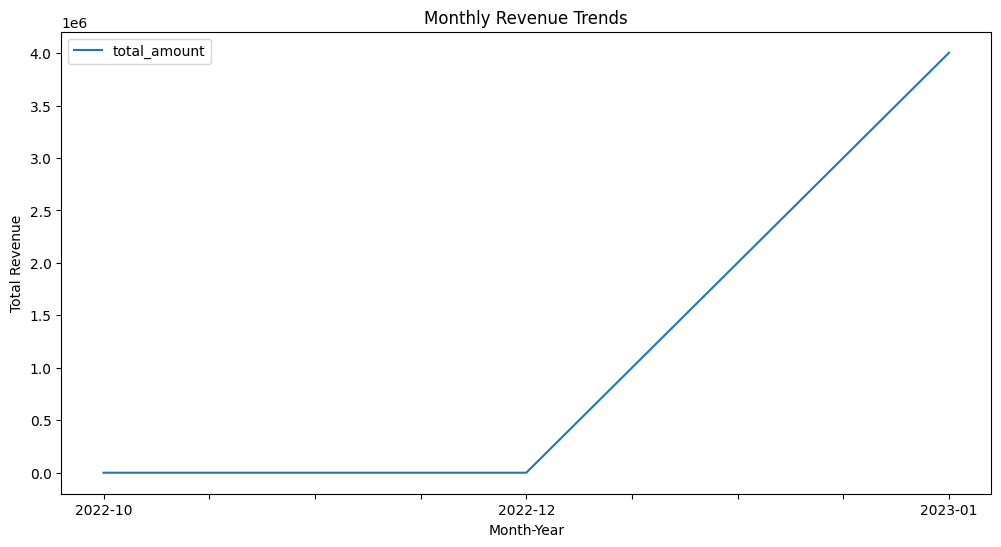

In [154]:
# Group data by month and analyse monthly revenue
# Extract month and year from tpep_pickup_datetime
rajtaxi1['pickup_month_year'] = pd.to_datetime(rajtaxi1['tpep_pickup_datetime']).dt.to_period('M')

# Group by month-year and calculate total revenue
monthly_revenue = rajtaxi1.groupby('pickup_month_year')['total_amount'].sum()

# Reset index for better visualization
monthly_revenue = monthly_revenue.reset_index()

# Convert pickup_month_year to string for plotting
monthly_revenue['pickup_month_year'] = monthly_revenue['pickup_month_year'].astype(str)

# Plot monthly trends
monthly_revenue.plot(kind='line', x='pickup_month_year', y='total_amount', figsize=(12, 6), 
                     title='Monthly Revenue Trends', xlabel='Month-Year', ylabel='Total Revenue')


In [155]:
# Remove rows where total_amount > 20,000
rajtaxi1 = rajtaxi1[rajtaxi1['total_amount'] <= 20000]

In [156]:
rajtaxi1 = rajtaxi1[rajtaxi1['total_amount'] <= 1400]

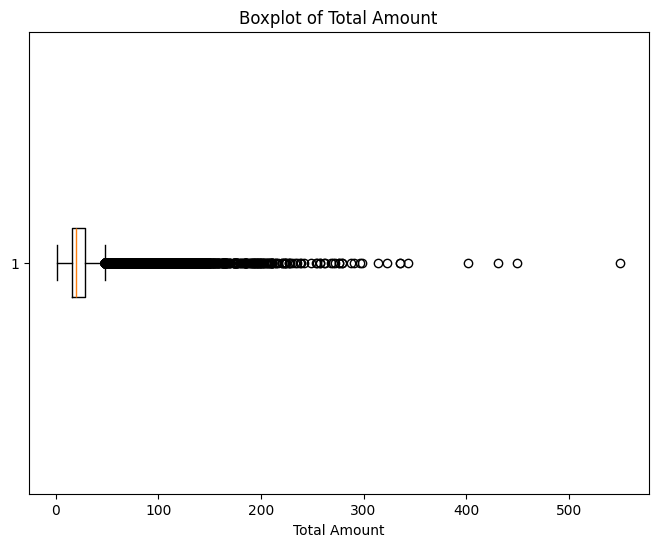

In [157]:
plt.figure(figsize=(8, 6))
plt.boxplot(rajtaxi1['total_amount'].dropna(), vert=False)
plt.title('Boxplot of Total Amount')
plt.xlabel('Total Amount')
plt.show()

In [158]:
rajtaxi1.head(20)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0          2  2023-01-10 00:44:09   2023-01-10 00:51:23              1.0   
1          1  2023-01-15 00:32:10   2023-01-15 00:42:27              1.0   
2          1  2023-01-29 00:29:35   2023-01-29 00:42:50              2.0   
3          2  2023-01-14 00:14:30   2023-01-14 00:27:04              1.0   
4          2  2023-01-03 00:55:05   2023-01-03 01:03:28              1.0   
5          2  2023-01-17 00:46:57   2023-01-17 00:51:21              1.0   
6          2  2023-01-01 00:05:41   2023-01-01 00:21:21              1.0   
7          1  2023-01-13 00:59:41   2023-01-13 01:37:23              1.0   
8          2  2023-01-22 00:57:00   2023-01-22 01:08:14              1.0   
9          2  2023-01-01 00:10:59   2023-01-01 00:24:24              1.0   
10         2  2023-01-07 00:59:29   2023-01-07 01:02:46              1.0   
11         2  2023-01-06 00:03:15   2023-01-06 00:07:05              1.0   
12         2  2023-01-29 00:26:21   2023-01-29 00:36:14              2.0   
13         2  2023-01-06 00:10:16   2023-01-06 00:15:15              1.0   
14         2  2023-01-19 00:20:25   2023-01-19 00:34:40              1.0   
15         2  2023-01-24 00:43:45   2023-01-24 00:58:02              1.0   
16         2  2023-01-14 00:48:57   2023-01-14 00:50:01              2.0   
17         1  2023-01-08 00:04:26   2023-01-08 00:27:46              2.0   
18         2  2023-01-09 00:54:18   2023-01-09 00:57:54              3.0   
19         1  2023-01-15 00:01:07   2023-01-15 00:10:46              3.0   

    trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            1.97         1.0                  N           142           164   
1            1.50         1.0                  N           113            79   
2            2.60         1.0                  N           263           143   
3            1.79         1.0                  N            79           158   
4            3.34         1.0                  N           132           132   
5            1.34         1.0                  N           170           162   
6            1.79         1.0                  N           239            50   
7           20.80         2.0                  N           132           262   
8            2.25         1.0                  N           148           170   
9            1.44         1.0                  N           234            79   
10           0.56         1.0                  N            79            79   
11           1.31         1.0                  N           161           236   
12           1.60         1.0                  N           114            68   
13           1.46         1.0                  N           249            68   
14           4.11         1.0                  N            43           116   
15           5.14         1.0                  N           114           112   
16           0.36         1.0                  N           249            68   
17          15.70         1.0                  N           132           123   
18           1.00         1.0                  N           234           230   
19           1.80         1.0                  N           249           231   

    payment_type  ...  congestion_surcharge  airport_fee  pickup_hour  \
0              1  ...                   2.5         0.00            0   
1              1  ...                   2.5         0.00            0   
2              1  ...                   2.5         0.00            0   
3              1  ...                   2.5         0.00            0   
4              2  ...                   0.0         1.25            0   
5              2  ...                   2.5         0.00            0   
6              1  ...                   2.5         0.00            0   
7              1  ...                   2.5         1.25            0   
8              1  ...                   2.5         0.00            0

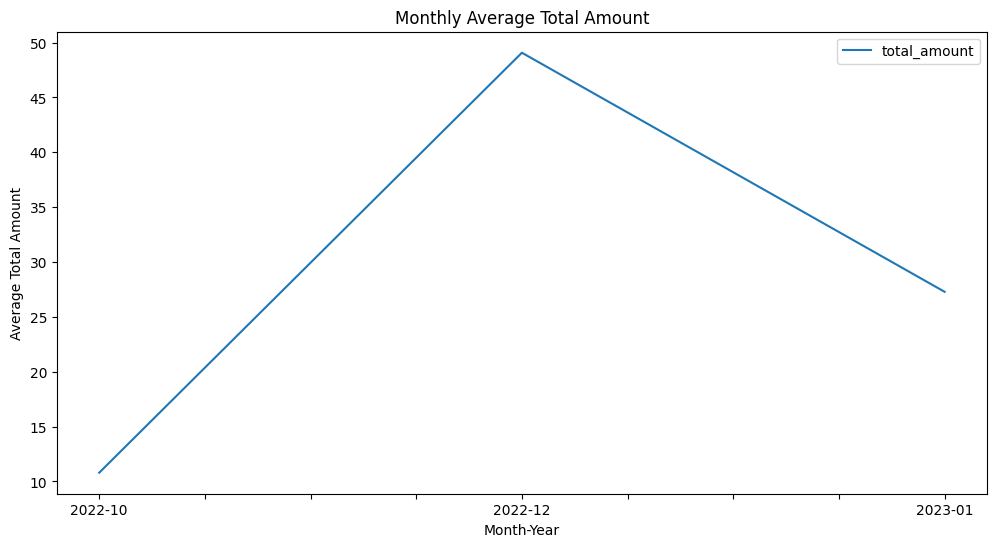

In [159]:
# Group by month-year and calculate average total_amount
monthly_avg_revenue = rajtaxi1.groupby('pickup_month_year')['total_amount'].mean().reset_index()

# Convert pickup_month_year to string for plotting
monthly_avg_revenue['pickup_month_year'] = monthly_avg_revenue['pickup_month_year'].astype(str)

# Plot monthly trends
monthly_avg_revenue.plot(kind='line', x='pickup_month_year', y='total_amount', figsize=(12, 6), 
                         title='Monthly Average Total Amount', xlabel='Month-Year', ylabel='Average Total Amount')
plt.show()

In [160]:
rajtaxi1.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-10 00:44:09   2023-01-10 00:51:23              1.0   
1         1  2023-01-15 00:32:10   2023-01-15 00:42:27              1.0   
2         1  2023-01-29 00:29:35   2023-01-29 00:42:50              2.0   
3         2  2023-01-14 00:14:30   2023-01-14 00:27:04              1.0   
4         2  2023-01-03 00:55:05   2023-01-03 01:03:28              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.97         1.0                  N           142           164   
1           1.50         1.0                  N           113            79   
2           2.60         1.0                  N           263           143   
3           1.79         1.0                  N            79           158   
4           3.34         1.0                  N           132           132   

   payment_type  ...  congestion_surcharge  airport_fee  pickup_hour  \
0             1  ...                   2.5         0.00            0   
1             1  ...                   2.5         0.00            0   
2             1  ...                   2.5         0.00            0   
3             1  ...                   2.5         0.00            0   
4             2  ...                   0.0         1.25            0   

   Pick-up Date  Pick-up Time  Drop-off Date  Drop-pff Time Time  pickup_day  \
0    2023-01-10      00:44:09     2023-01-10            00:51:23     Tuesday   
1    2023-01-15      00:32:10     2023-01-15            00:42:27      Sunday   
2    2023-01-29      00:29:35     2023-01-29            00:42:50      Sunday   
3    2023-01-14      00:14:30     2023-01-14            00:27:04    Saturday   
4    2023-01-03      00:55:05     2023-01-03            01:03:28     Tuesday   

   pickup_month  pickup_month_year  
0           Jan            2023-01  
1           Jan            2023-01  
2           Jan            2023-01  
3           Jan            2023-01  
4           Jan            2023-01  

[5 rows x 27 columns]

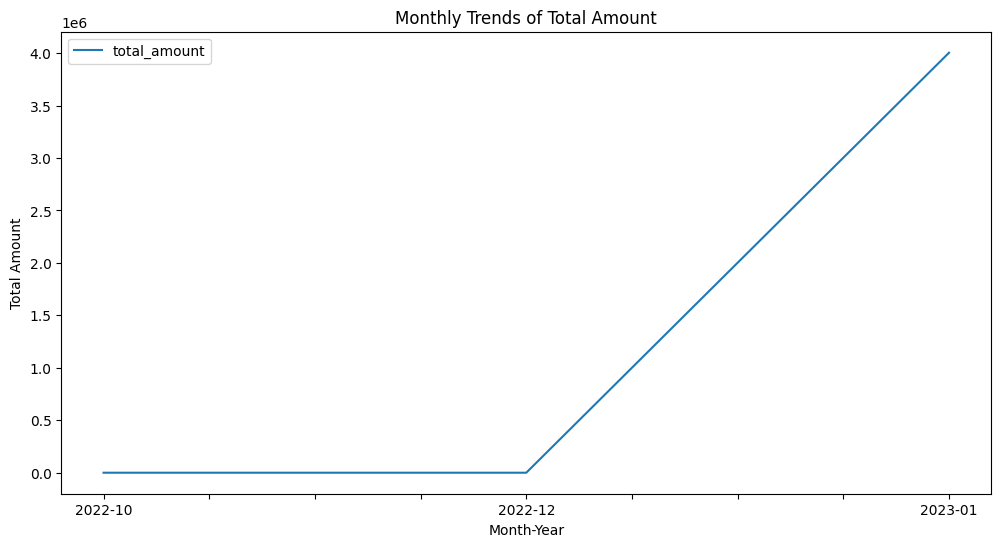

In [161]:
# Extract month and year from tpep_pickup_datetime
rajtaxi1['pickup_month_year'] = pd.to_datetime(rajtaxi['tpep_pickup_datetime']).dt.to_period('M')

# Group by month-year and calculate total revenue
monthly_revenue = rajtaxi1.groupby('pickup_month_year')['total_amount'].sum().reset_index()

# Convert pickup_month_year to string for better plotting
monthly_revenue['pickup_month_year'] = monthly_revenue['pickup_month_year'].astype(str)

# Plot monthly trends
monthly_revenue.plot(kind='line', x='pickup_month_year', y='total_amount', figsize=(12, 6), 
                     title='Monthly Trends of Total Amount', xlabel='Month-Year', ylabel='Total Amount')
plt.show()

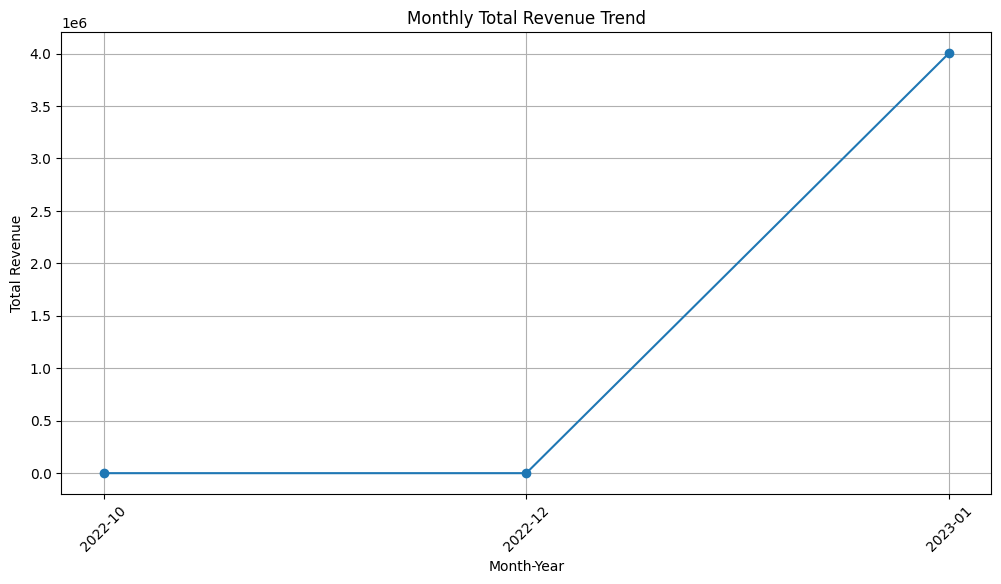

In [162]:
rajtaxi1['pickup_month_year'] = pd.to_datetime(rajtaxi1['tpep_pickup_datetime']).dt.to_period('M')

# Group by month-year and calculate total revenue
monthly_revenue = rajtaxi1.groupby('pickup_month_year')['total_amount'].sum().reset_index()

# Convert pickup_month_year to string for better plotting
monthly_revenue['pickup_month_year'] = monthly_revenue['pickup_month_year'].astype(str)

# Plot monthly trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue['pickup_month_year'], monthly_revenue['total_amount'], marker='o')
plt.title('Monthly Total Revenue Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [163]:
total_revenue=rajtaxi1.total_amount.sum()
print(total_revenue)

4004229.36


In [164]:
# Check data type of total_amount
print(rajtaxi1['total_amount'].dtype)



float64


In [165]:
# Round total_amount to 4 decimal places
rajtaxi1['total_amount'] = rajtaxi1['total_amount'].round(4)

In [166]:
rajtaxi1.total_amount.describe()

count    146734.000000
mean         27.289036
std          21.265108
min           1.010000
25%          15.480000
50%          20.150000
75%          28.560000
max         550.350000
Name: total_amount, dtype: float64

In [167]:
# Calculate quartiles for total_amount
quartiles = rajtaxi1['total_amount'].quantile([0.25, 0.5, 0.75])
print(quartiles)

0.25    15.48
0.50    20.15
0.75    28.56
Name: total_amount, dtype: float64


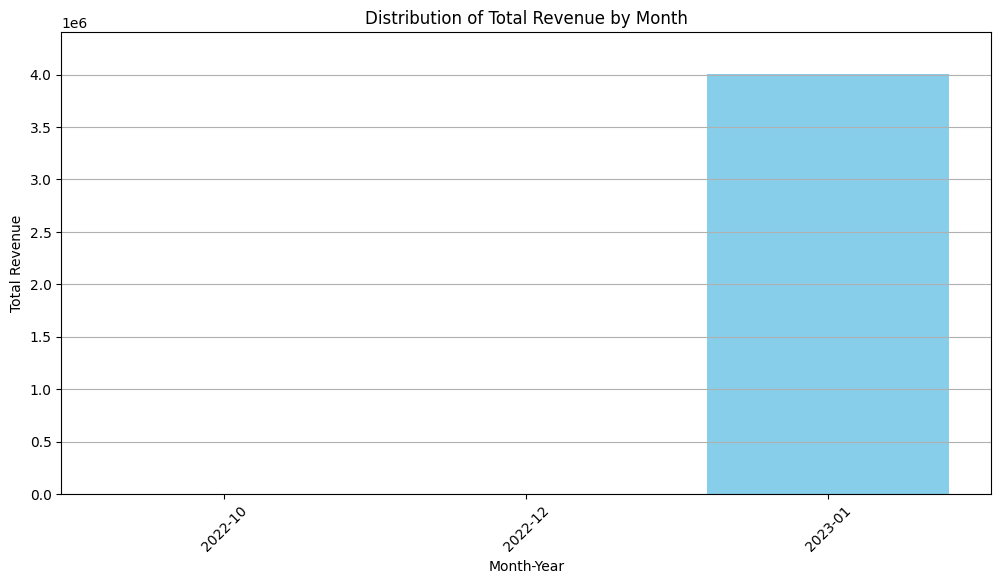

In [168]:
# Extract month and year from tpep_pickup_datetime
rajtaxi1['pickup_month_year'] = pd.to_datetime(rajtaxi1['tpep_pickup_datetime']).dt.to_period('M')

# Group by month-year and calculate total revenue
monthly_revenue = rajtaxi1.groupby('pickup_month_year')['total_amount'].sum().reset_index()

# Convert pickup_month_year to string for better plotting
monthly_revenue['pickup_month_year'] = monthly_revenue['pickup_month_year'].astype(str)

# Plot the distribution of total revenue by month
plt.figure(figsize=(12, 6))
plt.bar(monthly_revenue['pickup_month_year'], monthly_revenue['total_amount'], color='skyblue')
plt.title('Distribution of Total Revenue by Month')
plt.xlabel('Month-Year')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True, axis='y')  # Add gridlines for the y-axis

# Set y-axis limits to avoid scaling issues
plt.ylim(0, monthly_revenue['total_amount'].max() * 1.1)  # Add 10% padding

plt.show()

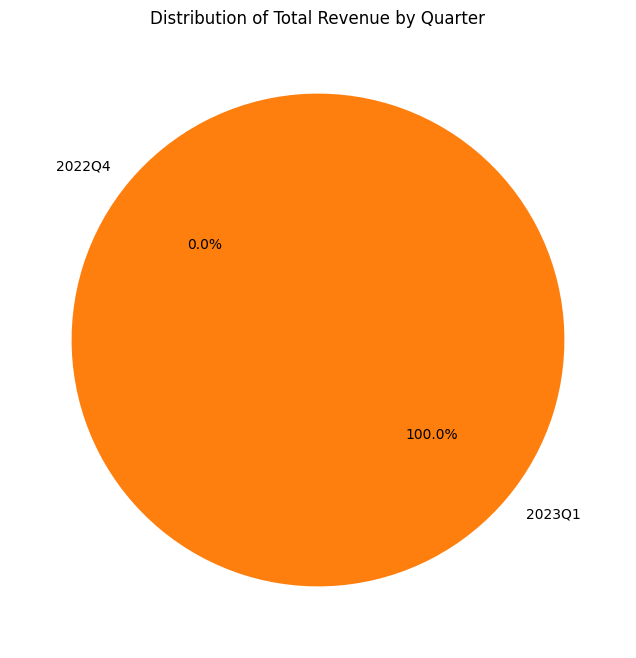

In [169]:
# Calculate proportion of each quarter

# Extract quarter and year from tpep_pickup_datetime
rajtaxi1['pickup_quarter_year'] = pd.to_datetime(rajtaxi1['tpep_pickup_datetime']).dt.to_period('Q')

# Group by quarter-year and calculate total revenue
quarterly_revenue = rajtaxi1.groupby('pickup_quarter_year')['total_amount'].sum().reset_index()

# Convert pickup_quarter_year to string for better plotting
quarterly_revenue['pickup_quarter_year'] = quarterly_revenue['pickup_quarter_year'].astype(str)

# Plot the distribution of total revenue by quarter as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(quarterly_revenue['total_amount'], labels=quarterly_revenue['pickup_quarter_year'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Total Revenue by Quarter')
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [170]:
rajtaxi1.trip_distance.describe()

count    146734.000000
mean          3.411123
std           4.427846
min           0.010000
25%           1.100000
50%           1.800000
75%           3.350000
max         159.850000
Name: trip_distance, dtype: float64

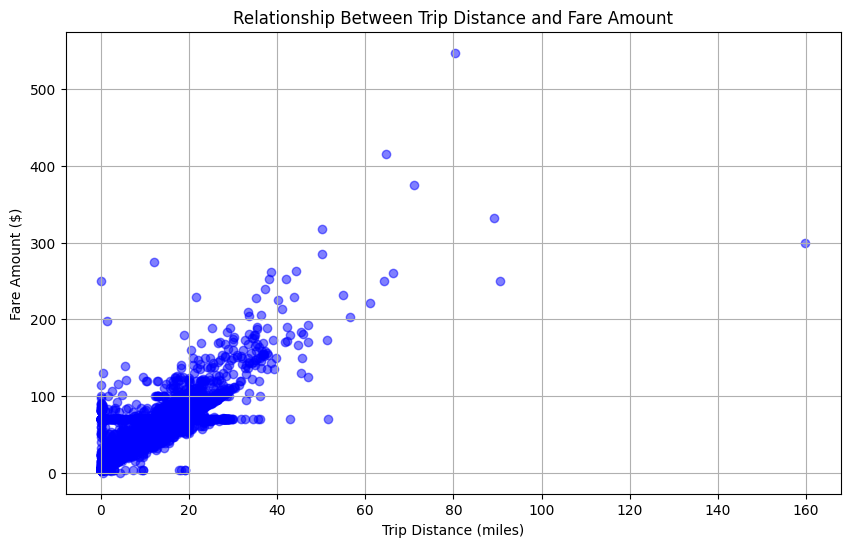

In [172]:
# Show how trip fare is affected by distance

plt.figure(figsize=(10, 6))
plt.scatter(rajtaxi1['trip_distance'], rajtaxi1['fare_amount'], alpha=0.5, color='blue')
plt.title('Relationship Between Trip Distance and Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()

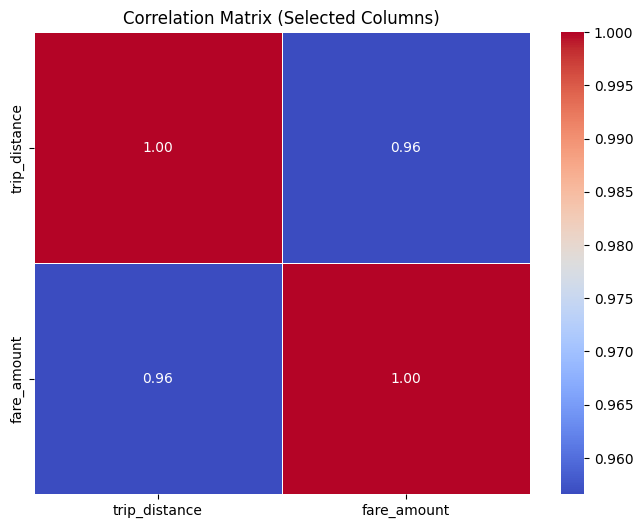

In [173]:
# Select specific columns for correlation analysis
#trip_distance'], rajtaxi['fare_amount']
columns_of_interest = ['trip_distance', 'fare_amount']
correlation_matrix = rajtaxi1[columns_of_interest].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (Selected Columns)')
plt.show()

In [174]:
# Calculate trip duration in minutes
rajtaxi1['trip_duration'] = (pd.to_datetime(rajtaxi1['tpep_dropoff_datetime']) - pd.to_datetime(rajtaxi1['tpep_pickup_datetime'])).dt.total_seconds() / 60

In [175]:
rajtaxi1.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-10 00:44:09   2023-01-10 00:51:23              1.0   
1         1  2023-01-15 00:32:10   2023-01-15 00:42:27              1.0   
2         1  2023-01-29 00:29:35   2023-01-29 00:42:50              2.0   
3         2  2023-01-14 00:14:30   2023-01-14 00:27:04              1.0   
4         2  2023-01-03 00:55:05   2023-01-03 01:03:28              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.97         1.0                  N           142           164   
1           1.50         1.0                  N           113            79   
2           2.60         1.0                  N           263           143   
3           1.79         1.0                  N            79           158   
4           3.34         1.0                  N           132           132   

   payment_type  ...  pickup_hour  Pick-up Date  Pick-up Time  Drop-off Date  \
0             1  ...            0    2023-01-10      00:44:09     2023-01-10   
1             1  ...            0    2023-01-15      00:32:10     2023-01-15   
2             1  ...            0    2023-01-29      00:29:35     2023-01-29   
3             1  ...            0    2023-01-14      00:14:30     2023-01-14   
4             2  ...            0    2023-01-03      00:55:05     2023-01-03   

   Drop-pff Time Time  pickup_day  pickup_month  pickup_month_year  \
0            00:51:23     Tuesday           Jan            2023-01   
1            00:42:27      Sunday           Jan            2023-01   
2            00:42:50      Sunday           Jan            2023-01   
3            00:27:04    Saturday           Jan            2023-01   
4            01:03:28     Tuesday           Jan            2023-01   

   pickup_quarter_year  trip_duration  
0               2023Q1       7.233333  
1               2023Q1      10.283333  
2               2023Q1      13.250000  
3               2023Q1      12.566667  
4               2023Q1       8.383333  

[5 rows x 29 columns]

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

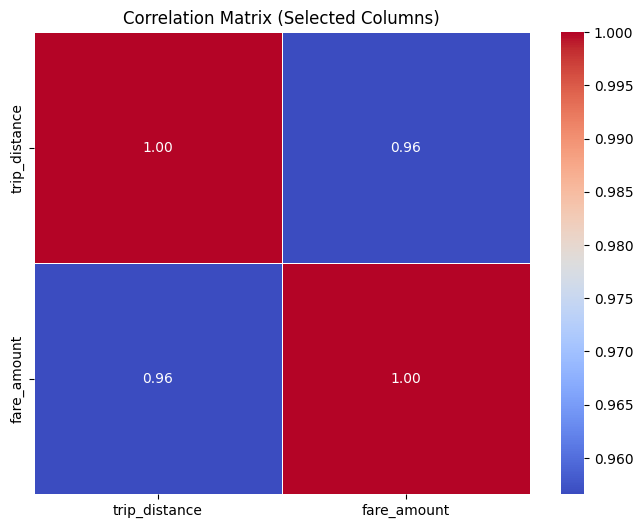

In [176]:
# Show relationship between fare and trip duration
columns_of_interest = ['trip_distance', 'fare_amount']
correlation_matrix = rajtaxi1[columns_of_interest].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (Selected Columns)')
plt.show()


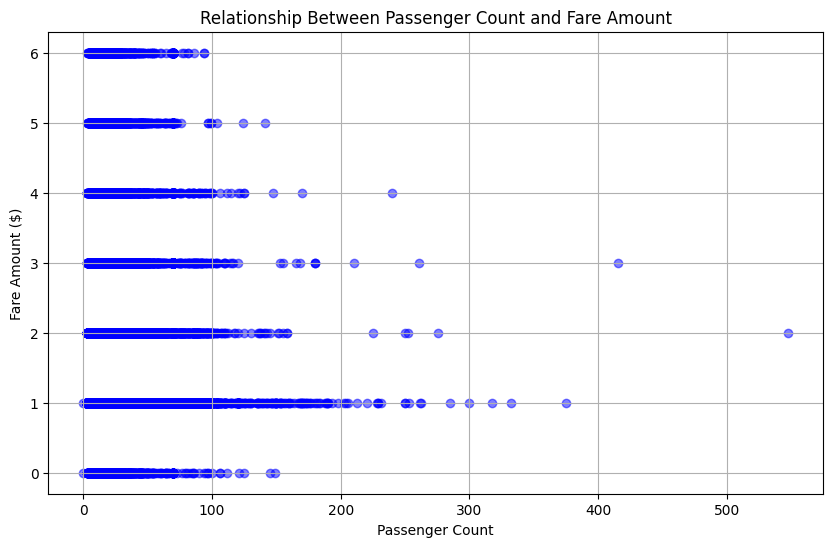

In [178]:
plt.figure(figsize=(10, 6))
plt.scatter(rajtaxi1['fare_amount'], rajtaxi1['passenger_count'], alpha=0.5, color='blue')
plt.title('Relationship Between Passenger Count and Fare Amount')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()

In [179]:
rajtaxi1.passenger_count.describe()

count    146734.000000
mean          1.360114
std           0.890785
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           6.000000
Name: passenger_count, dtype: float64

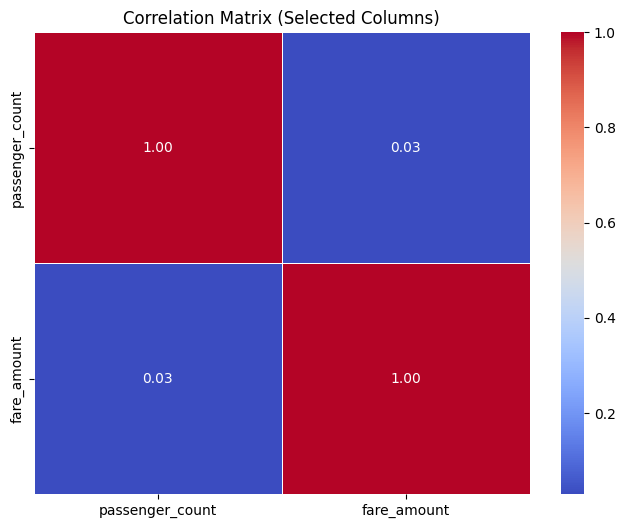

In [180]:
# Show relationship between fare and number of passengers
columns_of_interest = ['passenger_count', 'fare_amount']
correlation_matrix = rajtaxi1[columns_of_interest].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (Selected Columns)')
plt.show()


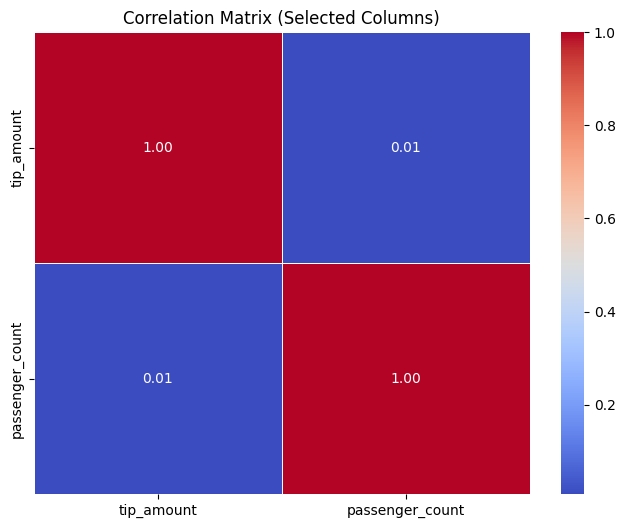

In [181]:
# Show relationship between tip and trip distance

# Show relationship between fare and number of passengers
columns_of_interest = ['tip_amount', 'passenger_count']
correlation_matrix = rajtaxi1[columns_of_interest].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (Selected Columns)')
plt.show()

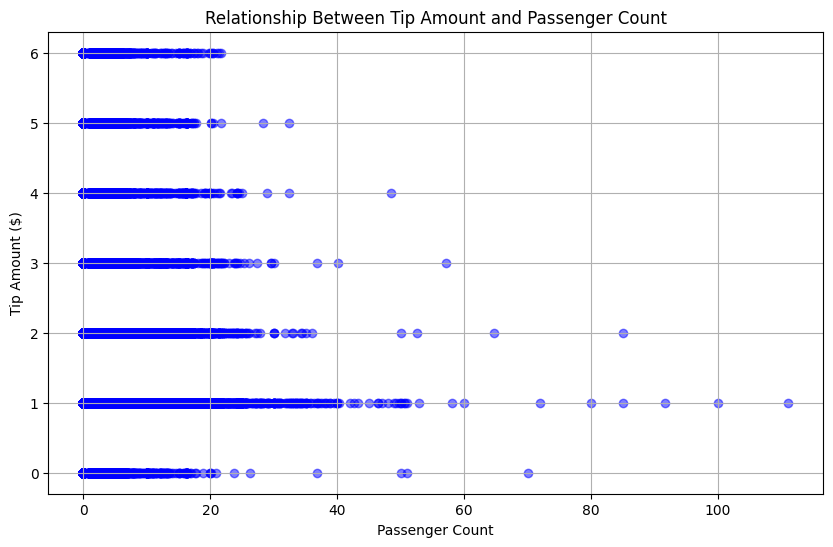

In [183]:
plt.figure(figsize=(10, 6))
plt.scatter(rajtaxi1['tip_amount'], rajtaxi1['passenger_count'], alpha=0.5, color='blue')
plt.title('Relationship Between Tip Amount and Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Tip Amount ($)')
plt.grid(True)
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [184]:
rajtaxi1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146734 entries, 0 to 152082
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               146734 non-null  int64         
 1   tpep_pickup_datetime   146734 non-null  datetime64[us]
 2   tpep_dropoff_datetime  146734 non-null  datetime64[us]
 3   passenger_count        146734 non-null  float64       
 4   trip_distance          146734 non-null  float64       
 5   RatecodeID             146734 non-null  float64       
 6   store_and_fwd_flag     146734 non-null  object        
 7   PULocationID           146734 non-null  int64         
 8   DOLocationID           146734 non-null  int64         
 9   payment_type           146734 non-null  int64         
 10  fare_amount            146734 non-null  float64       
 11  extra                  146734 non-null  float64       
 12  mta_tax                146734 non-null  float64  

In [ ]:
rajtaxi1.payment_type.describe()

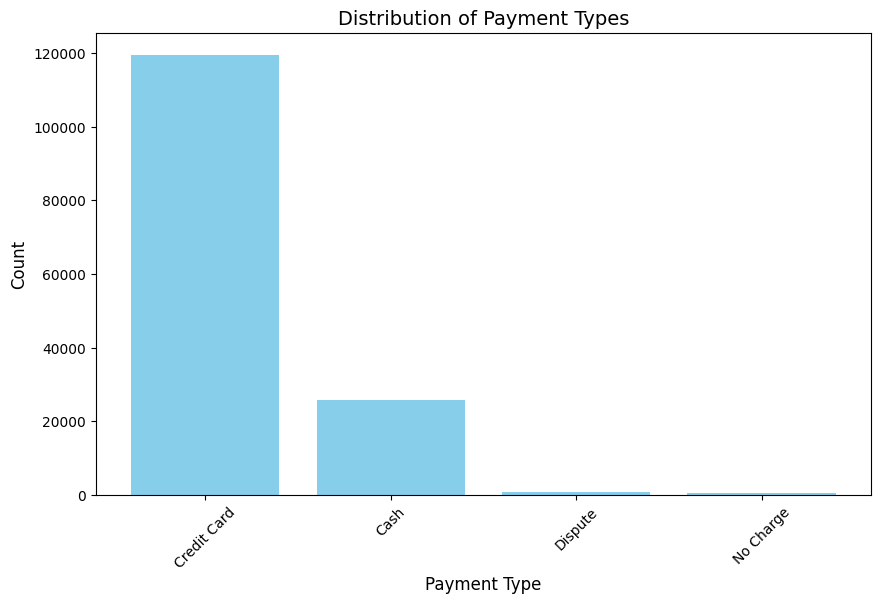

In [185]:
# Analyse the distribution of different payment types (payment_type).

payment_mapping = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided Trip'
}

rajtaxi1['payment_type_label'] = rajtaxi1['payment_type'].map(payment_mapping)

# Count the occurrences of each payment type
payment_counts = rajtaxi1['payment_type_label'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
plt.bar(payment_counts.index, payment_counts.values, color='skyblue')
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Payment Types', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [186]:
rajtaxi1.payment_type.value_counts()

payment_type
1    119485
2     25874
4       855
3       520
Name: count, dtype: int64

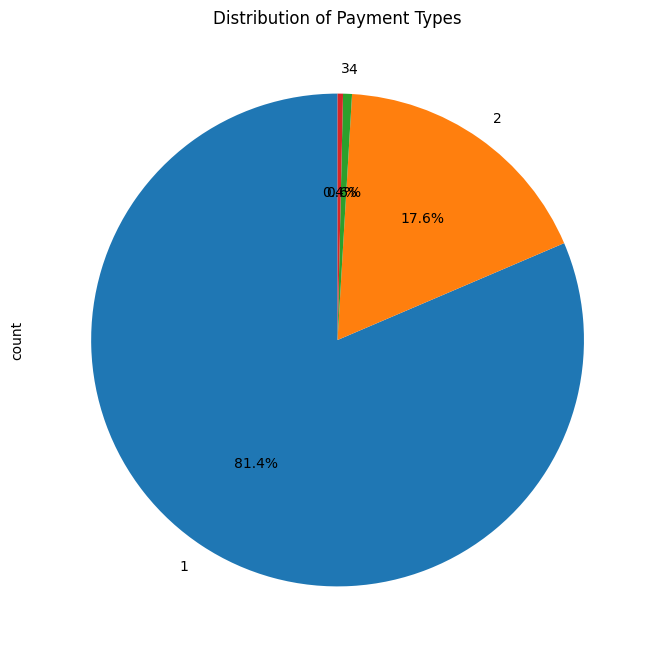

In [187]:
# Create a pie chart
rajtaxi1.payment_type.value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8), startangle=90)

# Add title
plt.title('Distribution of Payment Types')

# Display the plot
plt.show()

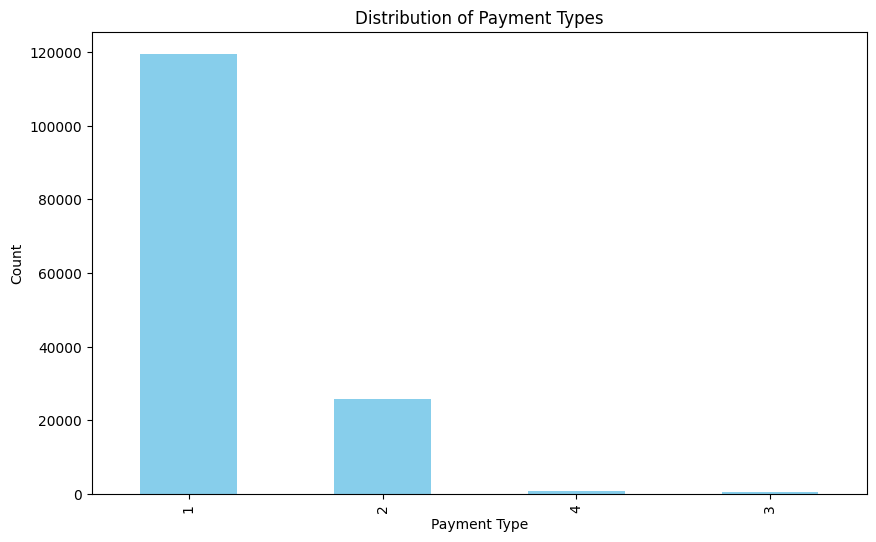

In [188]:
# Create a bar chart
rajtaxi1.payment_type.value_counts().plot.bar(figsize=(10, 6), color='skyblue')

# Add labels and title
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.title('Distribution of Payment Types')

# Display the plot
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [189]:
import geopandas as gpd
# Read the shapefile using geopandas
shapefile_path=r"C:\Users\etvxyag\OneDrive - Ericsson\Trainings\IIIT Blore Upgrad\Data Toolkit\NYC Taxi EDA Assignment\Data\Datasets and Dictionary\taxi_zones\taxi_zones.shp"
rajzones = gpd.read_file(shapefile_path) # read the .shp file using gpd
rajzones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

In [190]:
rajtaxi1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146734 entries, 0 to 152082
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               146734 non-null  int64         
 1   tpep_pickup_datetime   146734 non-null  datetime64[us]
 2   tpep_dropoff_datetime  146734 non-null  datetime64[us]
 3   passenger_count        146734 non-null  float64       
 4   trip_distance          146734 non-null  float64       
 5   RatecodeID             146734 non-null  float64       
 6   store_and_fwd_flag     146734 non-null  object        
 7   PULocationID           146734 non-null  int64         
 8   DOLocationID           146734 non-null  int64         
 9   payment_type           146734 non-null  int64         
 10  fare_amount            146734 non-null  float64       
 11  extra                  146734 non-null  float64       
 12  mta_tax                146734 non-null  float64  

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

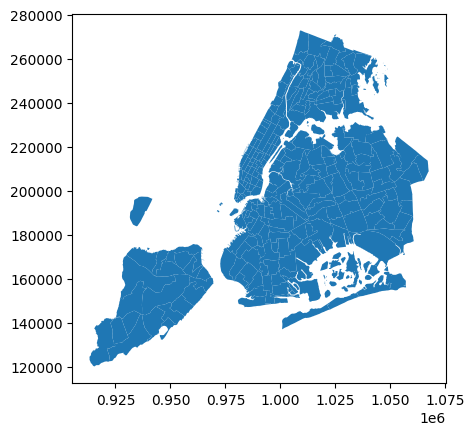

In [191]:
print(rajzones.info())
rajzones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [192]:
# Merge zones and trip records using locationID and PULocationID

rajresult = pd.merge(rajzones, rajtaxi1, left_on='LocationID', right_on='PULocationID', how='inner')
rajresult.head()

OBJECTID  Shape_Leng  Shape_Area            zone  LocationID borough  \
0         1    0.116357    0.000782  Newark Airport           1     EWR   
1         1    0.116357    0.000782  Newark Airport           1     EWR   
2         1    0.116357    0.000782  Newark Airport           1     EWR   
3         1    0.116357    0.000782  Newark Airport           1     EWR   
4         1    0.116357    0.000782  Newark Airport           1     EWR   

                                            geometry  VendorID  \
0  POLYGON ((933100.918 192536.086, 933091.011 19...         2   
1  POLYGON ((933100.918 192536.086, 933091.011 19...         2   
2  POLYGON ((933100.918 192536.086, 933091.011 19...         2   
3  POLYGON ((933100.918 192536.086, 933091.011 19...         2   
4  POLYGON ((933100.918 192536.086, 933091.011 19...         2   

  tpep_pickup_datetime tpep_dropoff_datetime  ...  Pick-up Date  Pick-up Time  \
0  2023-01-13 03:50:30   2023-01-13 04:14:19  ...    2023-01-13      03:50:30   
1  2023-01-05 08:55:23   2023-01-05 09:14:38  ...    2023-01-05      08:55:23   
2  2023-01-17 11:08:14   2023-01-17 11:12:28  ...    2023-01-17      11:08:14   
3  2023-01-01 12:53:41   2023-01-01 12:53:50  ...    2023-01-01      12:53:41   
4  2023-01-01 13:09:28   2023-01-01 13:34:22  ...    2023-01-01      13:09:28   

   Drop-off Date Drop-pff Time Time  pickup_day  pickup_month  \
0     2023-01-13           04:14:19      Friday           Jan   
1     2023-01-05           09:14:38    Thursday           Jan   
2     2023-01-17           11:12:28     Tuesday           Jan   
3     2023-01-01           12:53:50      Sunday           Jan   
4     2023-01-01           13:34:22      Sunday           Jan   

   pickup_month_year  pickup_quarter_year  trip_duration  payment_type_label  
0            2023-01               2023Q1      23.816667         Credit Card  
1            2023-01               2023Q1      19.250000         Credit Card  
2            2023-01               2023Q1       4.233333           No Charge  
3            2023-01               2023Q1       0.150000         Credit Card  
4            2023-01               2023Q1      24.900000         Credit Card  

[5 rows x 37 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [193]:
rajresult.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 144880 entries, 0 to 144879
Data columns (total 37 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   OBJECTID               144880 non-null  int32         
 1   Shape_Leng             144880 non-null  float64       
 2   Shape_Area             144880 non-null  float64       
 3   zone                   144880 non-null  object        
 4   LocationID             144880 non-null  int32         
 5   borough                144880 non-null  object        
 6   geometry               144880 non-null  geometry      
 7   VendorID               144880 non-null  int64         
 8   tpep_pickup_datetime   144880 non-null  datetime64[us]
 9   tpep_dropoff_datetime  144880 non-null  datetime64[us]
 10  passenger_count        144880 non-null  float64       
 11  trip_distance          144880 non-null  float64       
 12  RatecodeID             144880 non-nu

In [195]:
# Group by LocationID and count the number of trips

trips_per_location = rajresult.groupby('LocationID').size().reset_index(name='total_trips')
print(trips_per_location)


     LocationID  total_trips
0             1            7
1             3            1
2             4          150
3             5            4
4             6            2
..          ...          ...
217         259            3
218         260           26
219         261          578
220         262         2047
221         263         3282

[222 rows x 2 columns]


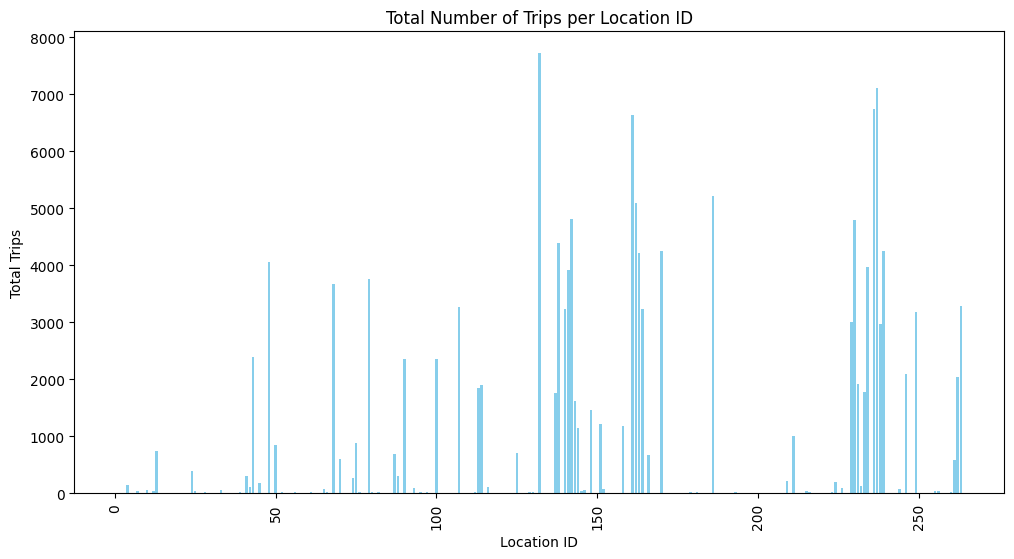

In [196]:
# Group data by location and calculate the number of trips
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(trips_per_location['LocationID'], trips_per_location['total_trips'], color='skyblue')
plt.xlabel('Location ID')
plt.ylabel('Total Trips')
plt.title('Total Number of Trips per Location ID')
plt.xticks(rotation=90)
plt.show()

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [197]:
# Merge trip counts back to the zones GeoDataFrame
rajresult = pd.merge(rajresult, trips_per_location, on='LocationID', how='left')


In [198]:
rajresult.head()

OBJECTID  Shape_Leng  Shape_Area            zone  LocationID borough  \
0         1    0.116357    0.000782  Newark Airport           1     EWR   
1         1    0.116357    0.000782  Newark Airport           1     EWR   
2         1    0.116357    0.000782  Newark Airport           1     EWR   
3         1    0.116357    0.000782  Newark Airport           1     EWR   
4         1    0.116357    0.000782  Newark Airport           1     EWR   

                                            geometry  VendorID  \
0  POLYGON ((933100.918 192536.086, 933091.011 19...         2   
1  POLYGON ((933100.918 192536.086, 933091.011 19...         2   
2  POLYGON ((933100.918 192536.086, 933091.011 19...         2   
3  POLYGON ((933100.918 192536.086, 933091.011 19...         2   
4  POLYGON ((933100.918 192536.086, 933091.011 19...         2   

  tpep_pickup_datetime tpep_dropoff_datetime  ...  Pick-up Time  \
0  2023-01-13 03:50:30   2023-01-13 04:14:19  ...      03:50:30   
1  2023-01-05 08:55:23   2023-01-05 09:14:38  ...      08:55:23   
2  2023-01-17 11:08:14   2023-01-17 11:12:28  ...      11:08:14   
3  2023-01-01 12:53:41   2023-01-01 12:53:50  ...      12:53:41   
4  2023-01-01 13:09:28   2023-01-01 13:34:22  ...      13:09:28   

   Drop-off Date  Drop-pff Time Time pickup_day  pickup_month  \
0     2023-01-13            04:14:19     Friday           Jan   
1     2023-01-05            09:14:38   Thursday           Jan   
2     2023-01-17            11:12:28    Tuesday           Jan   
3     2023-01-01            12:53:50     Sunday           Jan   
4     2023-01-01            13:34:22     Sunday           Jan   

   pickup_month_year  pickup_quarter_year  trip_duration  payment_type_label  \
0            2023-01               2023Q1      23.816667         Credit Card   
1            2023-01               2023Q1      19.250000         Credit Card   
2            2023-01               2023Q1       4.233333           No Charge   
3            2023-01               2023Q1       0.150000         Credit Card   
4            2023-01               2023Q1      24.900000         Credit Card   

   total_trips  
0            7  
1            7  
2            7  
3            7  
4            7  

[5 rows x 38 columns]

In [199]:
rajresult.head()

OBJECTID  Shape_Leng  Shape_Area            zone  LocationID borough  \
0         1    0.116357    0.000782  Newark Airport           1     EWR   
1         1    0.116357    0.000782  Newark Airport           1     EWR   
2         1    0.116357    0.000782  Newark Airport           1     EWR   
3         1    0.116357    0.000782  Newark Airport           1     EWR   
4         1    0.116357    0.000782  Newark Airport           1     EWR   

                                            geometry  VendorID  \
0  POLYGON ((933100.918 192536.086, 933091.011 19...         2   
1  POLYGON ((933100.918 192536.086, 933091.011 19...         2   
2  POLYGON ((933100.918 192536.086, 933091.011 19...         2   
3  POLYGON ((933100.918 192536.086, 933091.011 19...         2   
4  POLYGON ((933100.918 192536.086, 933091.011 19...         2   

  tpep_pickup_datetime tpep_dropoff_datetime  ...  Pick-up Time  \
0  2023-01-13 03:50:30   2023-01-13 04:14:19  ...      03:50:30   
1  2023-01-05 08:55:23   2023-01-05 09:14:38  ...      08:55:23   
2  2023-01-17 11:08:14   2023-01-17 11:12:28  ...      11:08:14   
3  2023-01-01 12:53:41   2023-01-01 12:53:50  ...      12:53:41   
4  2023-01-01 13:09:28   2023-01-01 13:34:22  ...      13:09:28   

   Drop-off Date  Drop-pff Time Time pickup_day  pickup_month  \
0     2023-01-13            04:14:19     Friday           Jan   
1     2023-01-05            09:14:38   Thursday           Jan   
2     2023-01-17            11:12:28    Tuesday           Jan   
3     2023-01-01            12:53:50     Sunday           Jan   
4     2023-01-01            13:34:22     Sunday           Jan   

   pickup_month_year  pickup_quarter_year  trip_duration  payment_type_label  \
0            2023-01               2023Q1      23.816667         Credit Card   
1            2023-01               2023Q1      19.250000         Credit Card   
2            2023-01               2023Q1       4.233333           No Charge   
3            2023-01               2023Q1       0.150000         Credit Card   
4            2023-01               2023Q1      24.900000         Credit Card   

   total_trips  
0            7  
1            7  
2            7  
3            7  
4            7  

[5 rows x 38 columns]

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

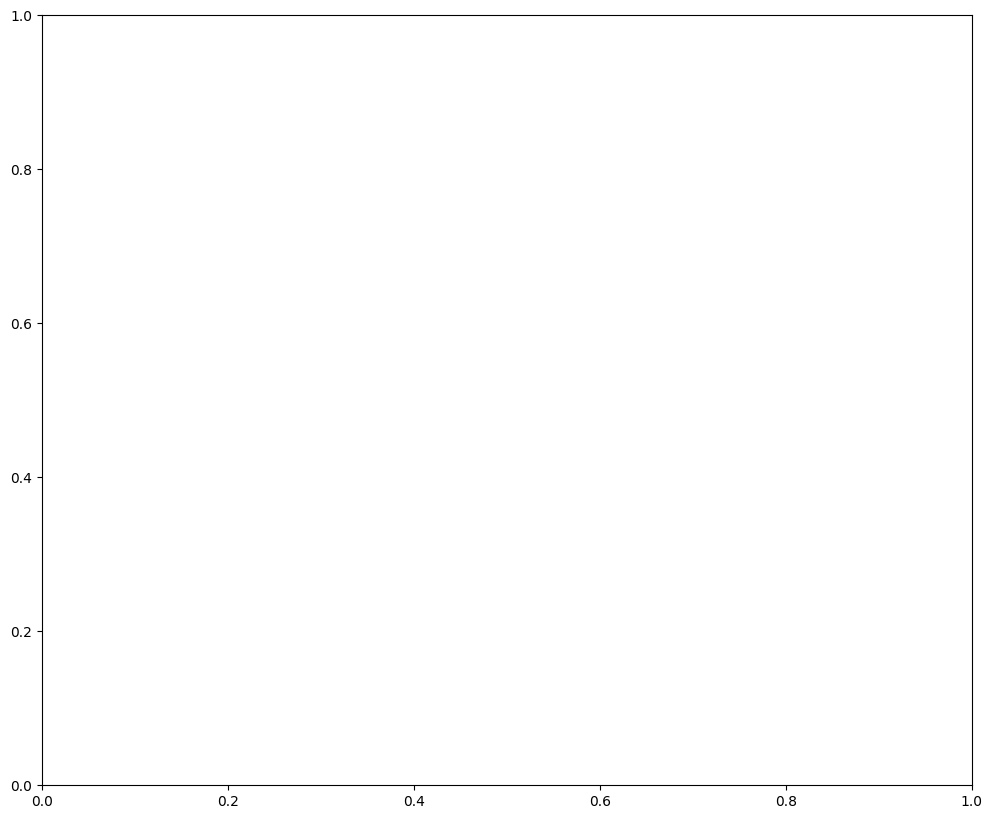

In [266]:
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

In [201]:
#rajresult.plot(column='total_trips', ax=ax, legend=True, cmap='OrRd', legend_kwds={'label': "Total Trips by Location"})
#ax.set_title('Total Number of Trips per Zone', fontsize=16)
#ax.set_axis_off()
#plt.show()

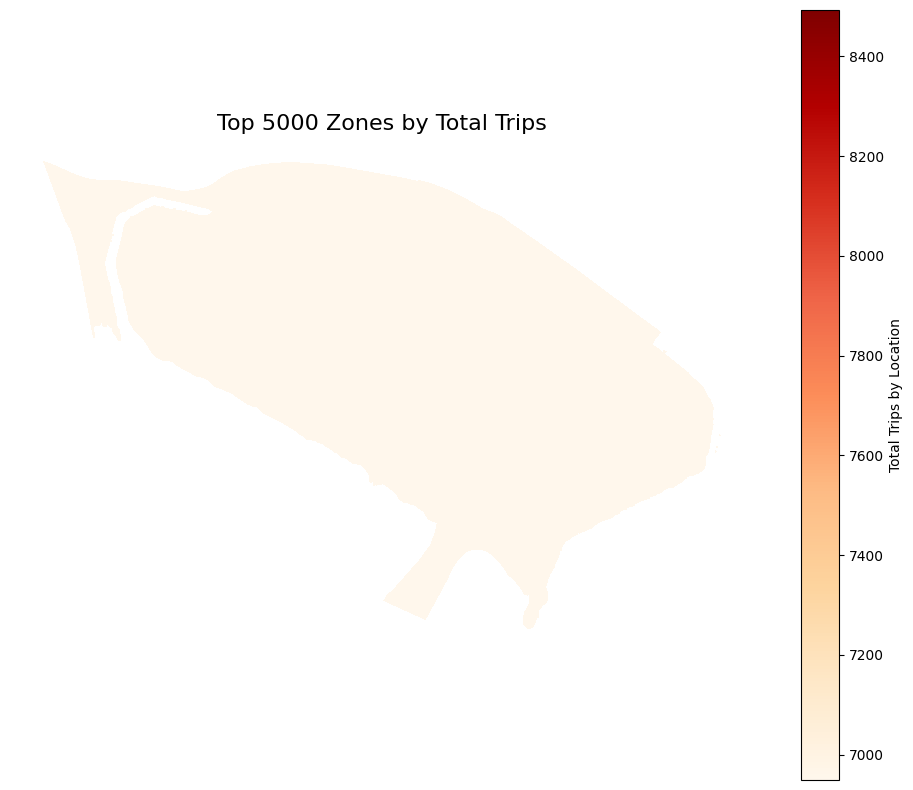

In [206]:
# Sort by total_trips and select the top N zones
top_n_zones = rajresult.sort_values(by='total_trips', ascending=False).head(5000)
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
top_n_zones.plot(column='total_trips', ax=ax, legend=True, cmap='OrRd', legend_kwds={'label': "Total Trips by Location"})
ax.set_title('Top 5000 Zones by Total Trips', fontsize=16)
ax.set_axis_off()
plt.show()

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

In [ ]:
# Define figure and axis


# Plot the map and display it



In [ ]:
# can you try displaying the zones DF sorted by the number of trips?



Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [ ]:
# Find routes which have the slowest speeds at different times of the day



How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [ ]:
# Visualise the number of trips per hour and find the busiest hour



Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [ ]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction =



**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [ ]:
# Compare traffic trends for the week days and weekends



What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [ ]:
# Find top 10 pickup and dropoff zones



**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios



**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones



Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [ ]:
# Filter for night hours (11 PM to 5 AM)



##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [ ]:
# Analyse the fare per mile per passenger for different passenger counts




**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [ ]:
# Compare the average fare per mile for different days and for different times of the day



**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [ ]:
# Compare fare per mile for different vendors



**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [ ]:
# Defining distance tiers



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [ ]:
# See how passenger count varies across hours and days




**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
# How does passenger count vary across zones



In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [ ]:
# How often is each surcharge applied?



## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.